# Research of the farm

## Business Objective and Work Plan

### Business Objective and Work Plan

**Objective:**  
The primary goal is to identify cows that produce good milk yield and tasty milk. This will enable the farmer to make informed decisions about purchasing new cows. The farmer wants each cow to produce at least 6000 kilograms of milk per year, with the milk being tasty.

To achieve this, we need to analyze data on the existing cows and develop two models: one to predict milk yield and another to determine the taste of the milk.

Criteria:  
- Milk yield greater than 6000 kg per year
- Tasty milk

**Work Plan:**

1. **Data Loading:**  
   - Import datasets for analysis.
   - Import necessary libraries.

2. **Data Preprocessing:**  
   - Perform data cleaning to handle missing values and remove duplicates.
   - Convert data types as needed.
   - Create additional columns in the dataset.

3. **Exploratory Data Analysis:**  
   - Create visualizations and analyze the data.
   - Conduct correlation analysis.
   - Generate scatter plots.

4. **Model Building:**  
   - Prepare features.
   - Train linear and logistic regression models.
   - Prepare features again.
   - Analyze metrics.
   - Calculate target features.

7. **Final Conclusions:**  
   - Provide recommendations to the farmer.

**Datasets:**

**ferma_main.csv:**  
   - Contains data on the farmer's cows, including information on feed, milk yield, breed, age, type of pasture, sire breed, milk taste, and percentages of fat and protein in the milk.
     
**ferma_dad.csv:**  
   - Contains the sire's name feature.

**cow_buy.csv:**  
   - Contains data on cows from "EcoFarm" that the farmer wants to study before purchasing. The features are similar to ferma_main, except for the target features: milk yield and milk taste.

## Data Upload

In [66]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import (
                mean_squared_error,
                mean_absolute_error,
                r2_score,
                accuracy_score, 
                confusion_matrix,recall_score,
                precision_score
             ) 

In [68]:
# load datasets
df_ferma_main = pd.read_csv('ferma_main.csv', sep = ';', decimal = ',')
df_ferma_dad = pd.read_csv('ferma_dad.csv', sep = ';', decimal = ',')
df_cow_buy = pd.read_csv('cow_buy.csv', sep = ';', decimal = ',')

In [70]:
df_ferma_main.head(3)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет


Convert to lowercase and rename columns. Dataset initially is in Russian, rename the columns to English 

In [84]:
df_ferma_main.columns = df_ferma_main.columns.str.lower()

In [75]:

df_ferma_main = df_ferma_main.rename(columns=
                                     {'удой, кг': 'yield',
                                      'эке (энергетическая кормовая единица)': 'eke',
                                      'сырой протеин, г': 'raw_protein', 
                                      'спо (сахаро-протеиновое соотношение)': 'spo',
                                      'тип пастбища': 'type_of_pasture',
                                      'порода папы_быка': 'sire_breed',
                                      'жирность,%': 'milk_fat',
                                      'белок,%': 'milk_protein',
                                      'вкус молока': 'milk_taste',
                                       'порода': 'breed',
                                       'возраст': 'age'}) 

In [86]:
pd.set_option('display.max_columns', 12)
display(df_ferma_main.head(3))

,id,yield,eke,raw_protein,spo,breed,type_of_pasture,sire_breed,milk_fat,milk_protein,milk_taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет


Convert to lowercase and rename columns

In [89]:
df_ferma_dad.head(3)

,id,sire_name
0,1,Буйный
1,2,Соловчик
2,3,Барин


In [91]:
df_ferma_dad = df_ferma_dad.rename(columns=
                                     {
                                      'Имя Папы': 'sire_name'}) 

In [93]:
df_ferma_dad.head(3)

,id,sire_name
0,1,Буйный
1,2,Соловчик
2,3,Барин


In [95]:
df_cow_buy.head(3)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет


Convert to lowercase and rename columns

In [98]:
df_cow_buy.columns = df_cow_buy.columns.str.lower()

In [100]:
df_cow_buy = df_cow_buy.rename(columns=
                                     {'тип пастбища': 'type_of_pasture',
                                      'порода': 'breed',
                                      'порода папы_быка': 'sire_breed',
                                      'текущая_жирность,%': 'milk_fat', 
                                      'текущий_уровень_белок,%': 'milk_protein', 
                                      'имя_папы': 'sire_name',
                                       'возраст': 'age'         }) 

In [102]:
df_cow_buy.head(3)

,breed,type_of_pasture,sire_breed,sire_name,milk_fat,milk_protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет


### Conclusion: We have 3 datasets:
- **df_ferma_dad**: This dataset contains information about the current herd of the farmer, including the annual milk yield of each cow, the nutritional value of the cow's feed, the raw protein content in the feed, the sugar-to-protein ratio in the cow's feed, the breed of the cow, the landscape of the meadows where the cow grazed, the breed of the cow's sire, the fat content in the milk (percentage), the protein content in the milk (percentage), the taste assessment according to the farmer's personal criteria (tasty, not tasty), and the age of the cow (less_than_2_years, more_than_2_years).

Features in the dataset **df_ferma_main.csv** can be divided into groups:
- **Cow Characteristics**: id, Breed, sire_breed, Age.
- **Feed Characteristics**: EKE (Energy Feed Unit), Raw Protein, g, SPO (Sugar-Protein Ratio).
- **Pasture Characteristics**: Pasture Type.
- **Milk Characteristics**: Milk Yield, kg, Fat Content, %, Protein Content, %, Milk Taste.

- **df_ferma_dad**: Contains the name of each cow's sire in the farmer's herd, with a unique identifier for each cow and the name of the cow's sire.

- **df_cow_buy**: Contains data such as the breed of the cow, the landscape of the meadows where the cow grazed, the breed of the cow's sire, the name of the cow's sire, the fat content in the milk (percentage), the protein content in the milk (percentage), and the age of the cow.

The data in the files **ferma_main.csv** and **cow_buy.csv** are similar, but the dataset **cow_buy.csv** has several peculiarities:
- The protein and fat content in the milk is indicated at the time of sale — when "EcoFarm" was feeding the cows its feed.
- The feed parameters EKE (Energy Feed Unit), Raw Protein, g, and SPO (Sugar-Protein Ratio) are absent. The customer's technologists have revised their feeding approach: for new cows, each of these parameters will be increased by 5%.
Additionally, the features Milk Yield, kg and Milk Taste are absent. These need to be predicted, as they are the target features.

##  Data preprocessing

 ###  preprocessing of dataset df_ferma_main

#### Data type and missing values

In [108]:
df_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               634 non-null    int64  
 1   yield            634 non-null    int64  
 2   eke              634 non-null    float64
 3   raw_protein      634 non-null    int64  
 4   spo              634 non-null    float64
 5   breed            634 non-null    object 
 6   type_of_pasture  634 non-null    object 
 7   sire_breed       634 non-null    object 
 8   milk_fat         634 non-null    float64
 9   milk_protein     634 non-null    float64
 10  milk_taste       634 non-null    object 
 11  age              634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


**Conclusion:** The dataset contains 634 observations and 12 features. No missing values were found.

In [111]:
df_ferma_main['milk_taste'].value_counts()

milk_taste
вкусно       371
не вкусно    263
Name: count, dtype: int64

In [113]:
df_ferma_main['age'].value_counts()

age
более_2_лет    524
менее_2_лет    110
Name: count, dtype: int64

In [115]:
df_ferma_main.dtypes

id                   int64
yield                int64
eke                float64
raw_protein          int64
spo                float64
breed               object
type_of_pasture     object
sire_breed          object
milk_fat           float64
milk_protein       float64
milk_taste          object
age                 object
dtype: object

#### Дубликаты

In [118]:
print(df_ferma_main.duplicated().sum())

5


In [120]:
df_ferma_main[df_ferma_main.duplicated()].head(3)

,id,yield,eke,raw_protein,spo,breed,type_of_pasture,sire_breed,milk_fat,milk_protein,milk_taste,age
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


Remove rows from the DataFrame that are complete duplicates, keeping only the first occurrences.

In [123]:
print(f'Dataset before change: {df_ferma_main.shape}')
df_ferma_main = df_ferma_main.drop_duplicates()
print(f'Dataset after change: {df_ferma_main.shape}')

Dataset before change: (634, 12)
Dataset after change: (629, 12)


**Conclusion:** Complete duplicates amounting to 4 rows have been removed.

Check for implicit duplicates.

In [127]:
print(df_ferma_main['breed'].value_counts())

breed
Вис Бик Айдиал     373
РефлешнСоверинг    256
Name: count, dtype: int64


In [129]:
print(df_ferma_main['type_of_pasture'].value_counts())

type_of_pasture
Холмистое    351
Равнинное    253
Равнинные     25
Name: count, dtype: int64


"Равнинное" and "Равнинные" in the `type_of_pasture` are likely the same value. Let's process it.

In [132]:
df_ferma_main.loc[:, 'type_of_pasture'] = df_ferma_main['type_of_pasture'].replace({
    'Равнинное': 'равнинное',
    'Равнинные': 'равнинное',
    'Холмистое': 'холмистое'
})

print(df_ferma_main['type_of_pasture'].value_counts())

type_of_pasture
холмистое    351
равнинное    278
Name: count, dtype: int64


In [134]:
print(df_ferma_main['sire_breed'].value_counts())

sire_breed
Соверин    311
Айдиал     240
Айдиалл     78
Name: count, dtype: int64


“Айдиал” and “Айдиалл” in the sire_breed are likely the same value. Let’s process it similarly to the previous example.

In [139]:
df_ferma_main['sire_breed'] = df_ferma_main['sire_breed'].replace('Айдиалл', 'Айдиал')
print(df_ferma_main['sire_breed'].value_counts())

sire_breed
Айдиал     318
Соверин    311
Name: count, dtype: int64


### Preprocessing dataset df_ferma_dad

#### Data type and missing values

In [143]:
df_ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         629 non-null    int64 
 1   sire_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


**Conclusion:** The dataset contains 629 observations and 2 features. No missing values were found. The data types are also correct.

#### Duplicates

In [147]:
print(df_ferma_dad.duplicated().sum())

0


In [149]:
print(df_ferma_dad['sire_name'].value_counts())

sire_name
Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: count, dtype: int64


**Conclusion:** No duplicates were found.


### Preprocessing dataset df_cow_buy

#### Data Type and missing values

In [154]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   breed            20 non-null     object 
 1   type_of_pasture  20 non-null     object 
 2   sire_breed       20 non-null     object 
 3   sire_name        20 non-null     object 
 4   milk_fat         20 non-null     float64
 5   milk_protein     20 non-null     float64
 6   age              20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


**Conclusion:** The dataset contains 20 observations and 7 features. No missing values were found.

#### Duplicates

In [158]:
print(df_cow_buy.duplicated().sum())

4


In [160]:
dupliactes = df_cow_buy[df_cow_buy.duplicated()]
display(dupliactes)

,breed,type_of_pasture,sire_breed,sire_name,milk_fat,milk_protein,age
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Most likely, these are different cows, as the dataset has few features and categories, making the probability of repeats non-zero.

We will leave the duplicates here, as this table does not participate in model training, so duplicates are not as critical.

Check for implicit duplicates.

In [164]:
print(df_cow_buy['breed'].value_counts())

breed
РефлешнСоверинг    11
Вис Бик Айдиал      9
Name: count, dtype: int64


In [166]:
print(df_cow_buy['type_of_pasture'].value_counts())

type_of_pasture
равнинное    11
холмистое     9
Name: count, dtype: int64


In [168]:
print(df_cow_buy['sire_name'].value_counts())

sire_name
Буйный      8
Геркулес    6
Барин       4
Соловчик    2
Name: count, dtype: int64


**Conclusion:** No implicit duplicates were found; one identical duplicate row was removed.

## Exploratory data analysis

### Analysis df_ferma_main

Let's start with the analysis of quantitative features. We'll look at the general statistical indicators.

In [174]:
df_ferma_main.describe()

,id,yield,eke,raw_protein,spo,milk_fat,milk_protein
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


The maximum milk yield is very high at 45,616 kg compared to the average of 6,188 kg. Let's proceed with the analysis of histogram distributions.

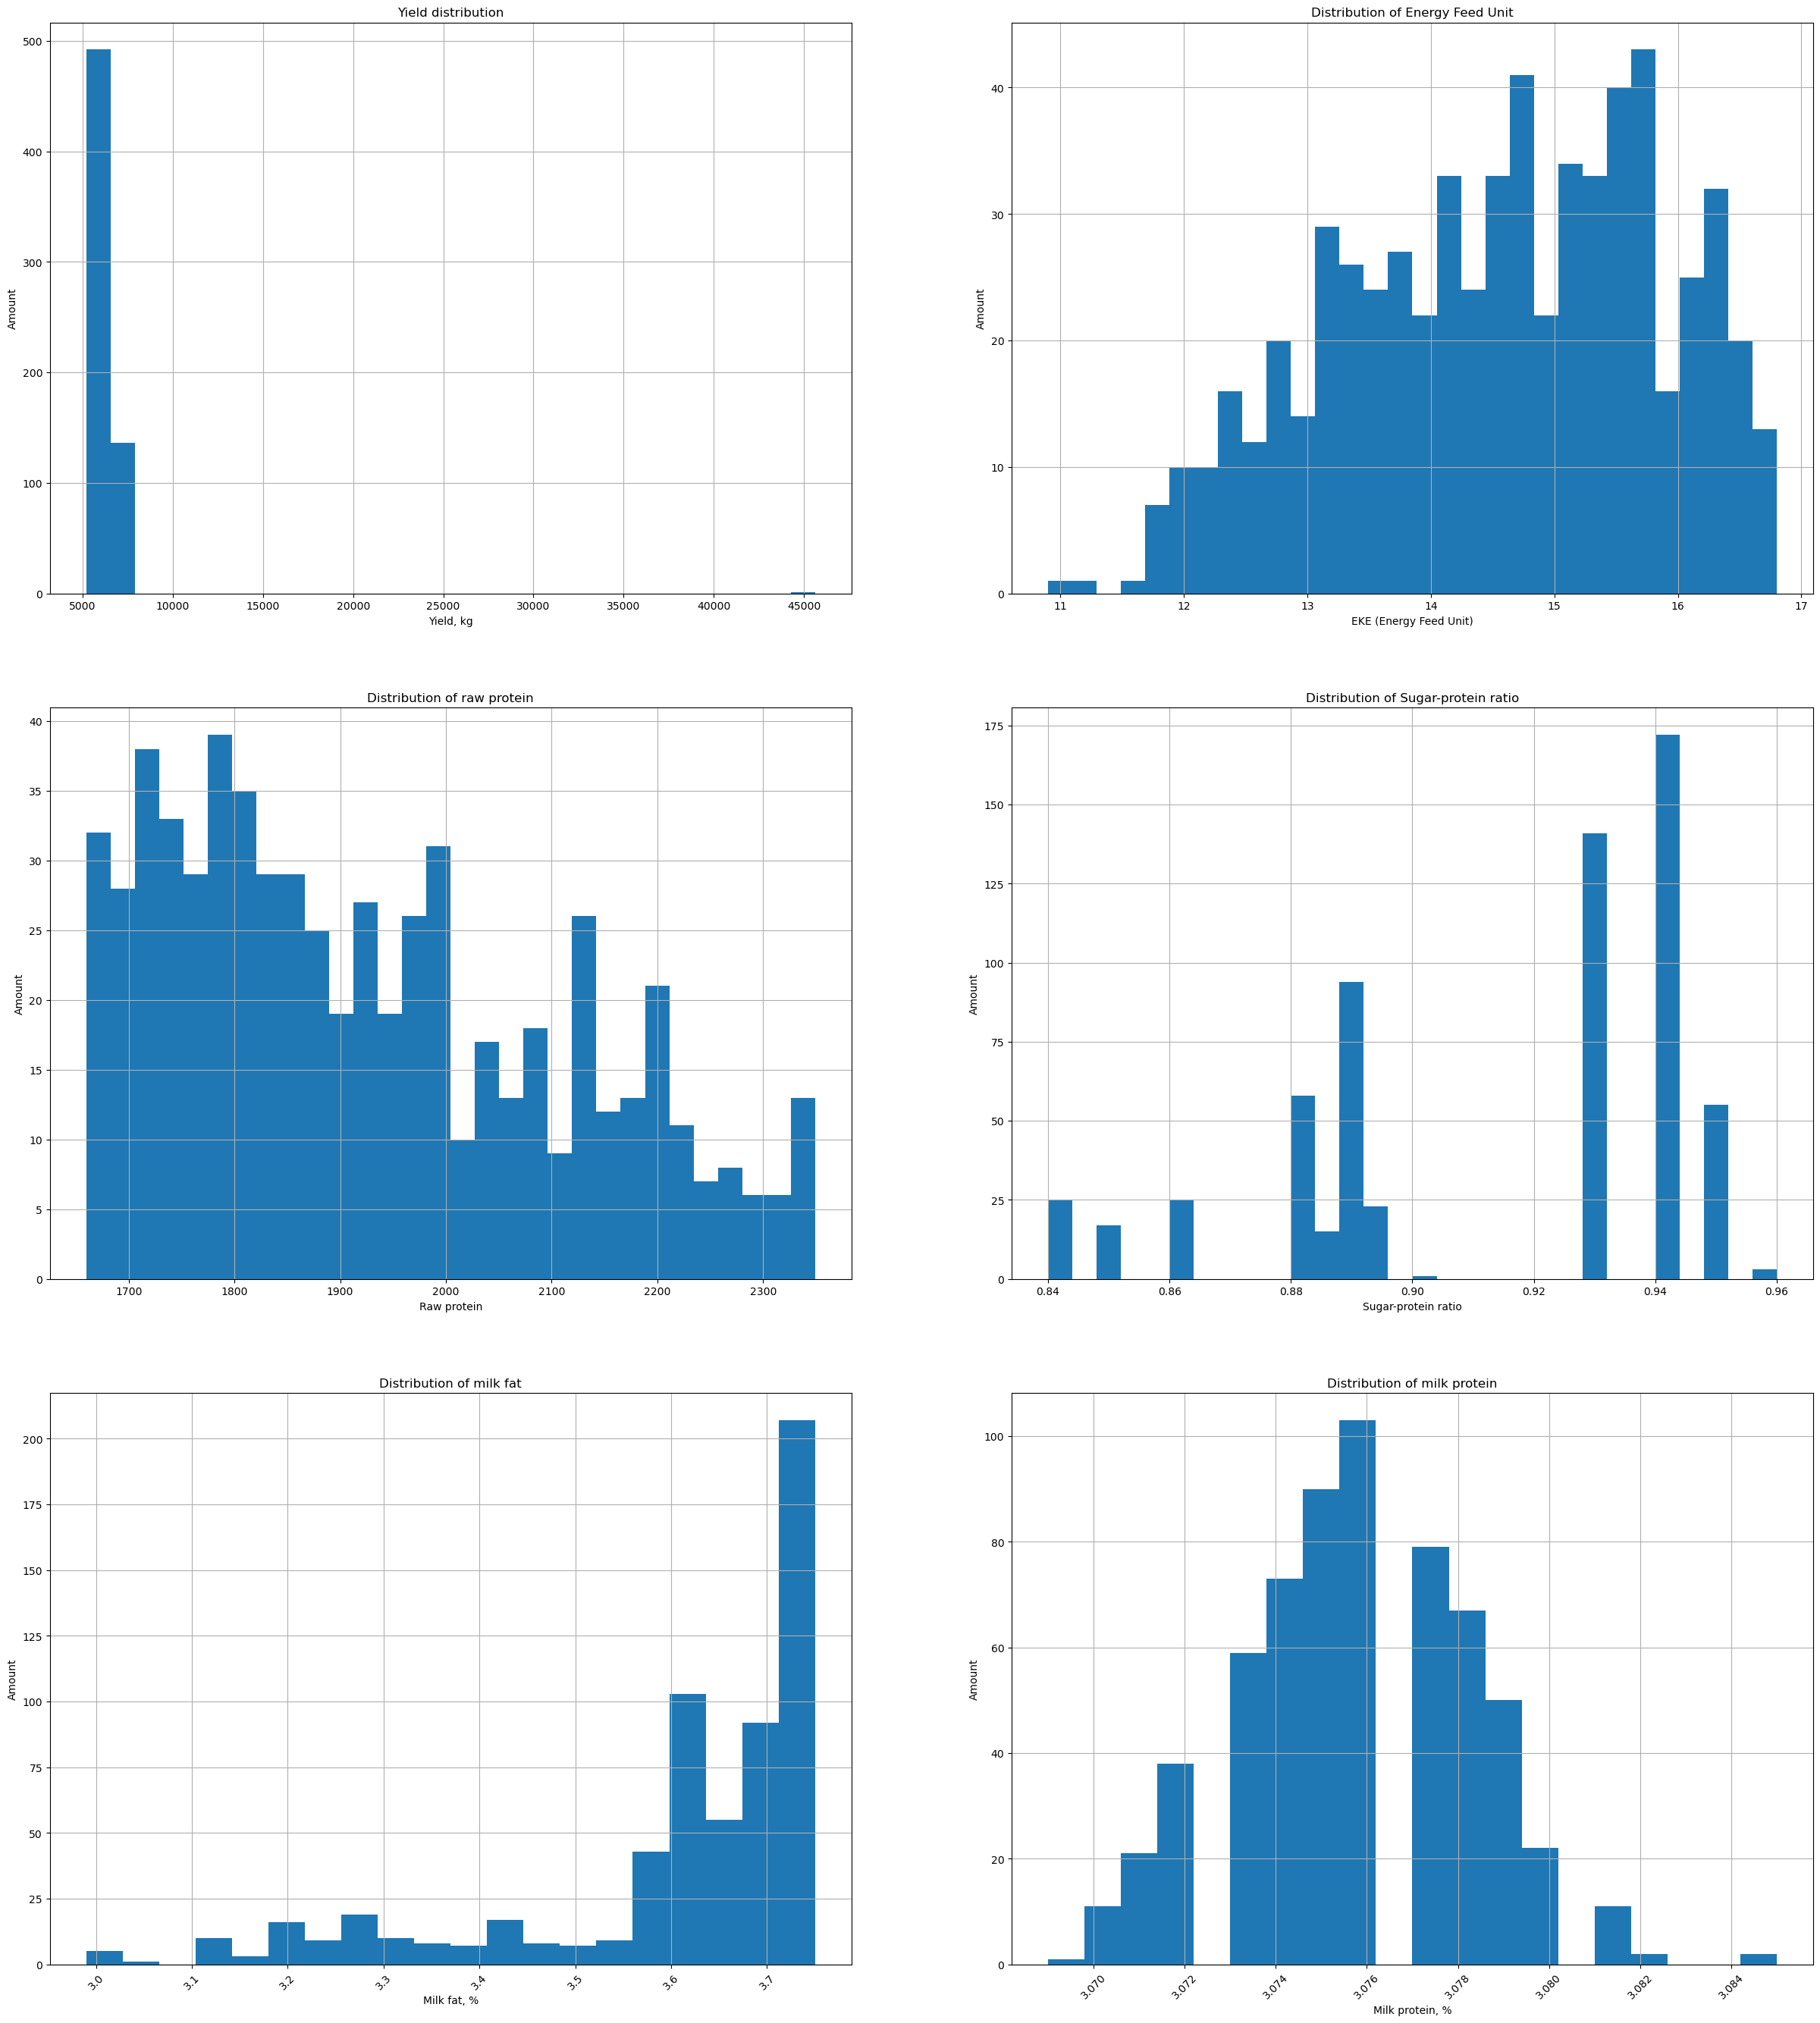

In [177]:
plt.figure(figsize=(30,45))

plt.subplot(4, 2, 1)
df_ferma_main['yield'].hist(bins=30)
plt.title('Yield distribution')
plt.xlabel('Yield, kg')
plt.ylabel('Amount')

plt.subplot(4, 2, 2) 
df_ferma_main['eke'].hist(bins=30 )
plt.title('Distribution of Energy Feed Unit')
plt.xlabel('EKE (Energy Feed Unit)')
plt.ylabel('Amount')


plt.subplot(4, 2, 3) 
df_ferma_main['raw_protein'].hist(bins=30 )
plt.title('Distribution of raw protein')
plt.xlabel('Raw protein')
plt.ylabel('Amount')

plt.subplot(4, 2, 4) 
df_ferma_main['spo'].hist(bins=30 )
plt.title('Distribution of Sugar-protein ratio')
plt.xlabel('Sugar-protein ratio')
plt.ylabel('Amount')

plt.subplot(4, 2, 5) 
df_ferma_main['milk_fat'].hist(bins=20 )
plt.title('Distribution of milk fat')
plt.xlabel('Milk fat, %')
plt.ylabel('Amount')
plt.xticks(rotation=45)


plt.subplot(4, 2, 6) 
df_ferma_main['milk_protein'].hist(bins=20 )
plt.title('Distribution of milk protein')
plt.xlabel('Milk protein, %')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()



**Normal Distribution Analysis:**
- **Milk Yield**: Anomalies can be seen, as previously noted. We will conduct a normal distribution analysis after removing the anomalies.
- **EKE (Energy Feed Unit)**: Ranges from 12 to 17
  - The distribution appears asymmetric with a slight right skew.
  - We observe several peaks and troughs (no bell shape).
  - These features indicate that the distribution is not normal.
- **Raw Protein**: Ranges from 1600 to 2350 g
  - We observe several peaks and troughs (no bell shape).
  - The distribution appears asymmetric.
  - These features indicate that the distribution is not normal.
- **SPO (Sugar-Protein Ratio)**: Ranges from 0.84 to 0.96
  - The graph shows clusters. Several peaks indicate that the data may be divided into groups.
  - There is also asymmetry, meaning the distribution is not normal.
- **Fat Percentage**: Ranges from 3% to 3.75%
  - We observe strong asymmetry with a right skew (where most of the data is located).
  - There is a long right tail.
  - The distribution is not normal.
- **Protein Percentage**: Ranges from 3.06% to 3.08%
  - The protein histogram looks more symmetrical and resembles a bell curve.
  - The distribution appears symmetric around the central value.
  - The tails decrease smoothly, and there is one large peak in the center.
  - It is likely that this distribution is close to normal.

For features like EKE, SPO, fat percentage, and protein percentage, we can see rare values. Let's examine them on a box plot.

Let’s perform a box plot analysis for milk yield and replace the outliers with the median value for this feature.

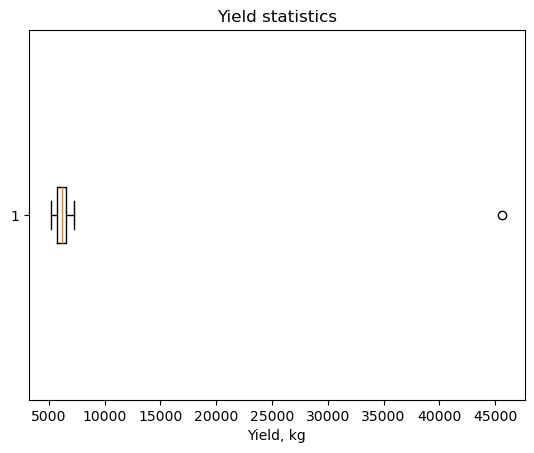

In [181]:
plt.boxplot(df_ferma_main['yield'], vert=False)  
plt.xlabel('Yield, kg')
plt.title('Yield statistics')
plt.show()

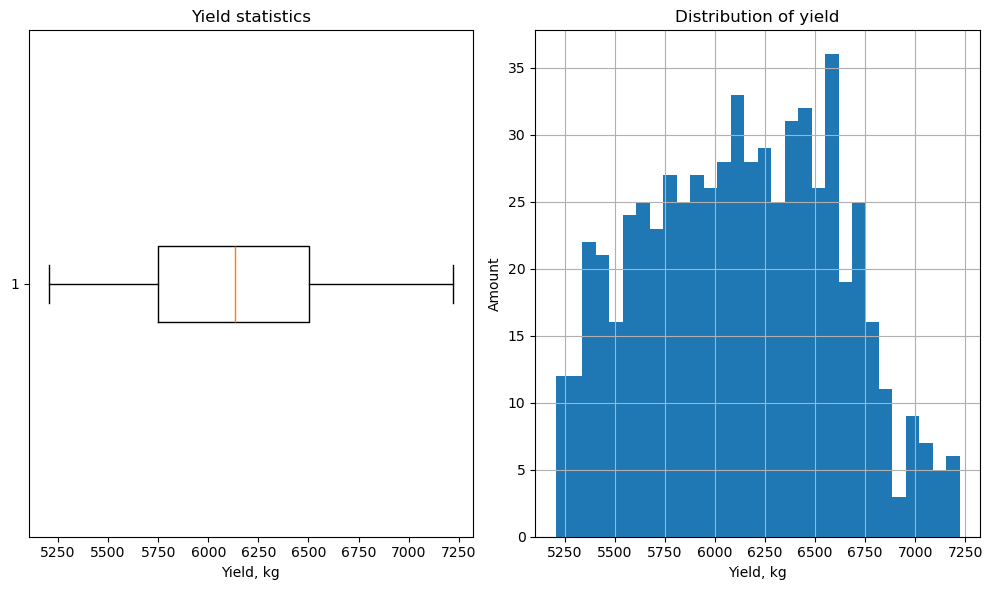

In [186]:
# Calculate the average without considering anomalies
mean_value = df_ferma_main[df_ferma_main['yield'] <= 10000]['yield'].mean()

# Convert mean_value to integer
mean_value = int(mean_value)

# Replace anomaly values with the average for the feature using .loc
df_ferma_main.loc[df_ferma_main['yield'] > 10000, 'yield'] = mean_value

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Boxplot
plt.subplot(1, 2, 1)
plt.boxplot(df_ferma_main['yield'], vert=False)  
plt.xlabel('Yield, kg')
plt.title('Yield statistics')

# Histogram
plt.subplot(1, 2, 2)
df_ferma_main['yield'].hist(bins=30)
plt.title('Distribution of yield')
plt.xlabel('Yield, kg')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

Judging by the histogram, the distribution of milk yield appears closer to symmetrical, with a noticeable bell shape typical of a normal distribution.

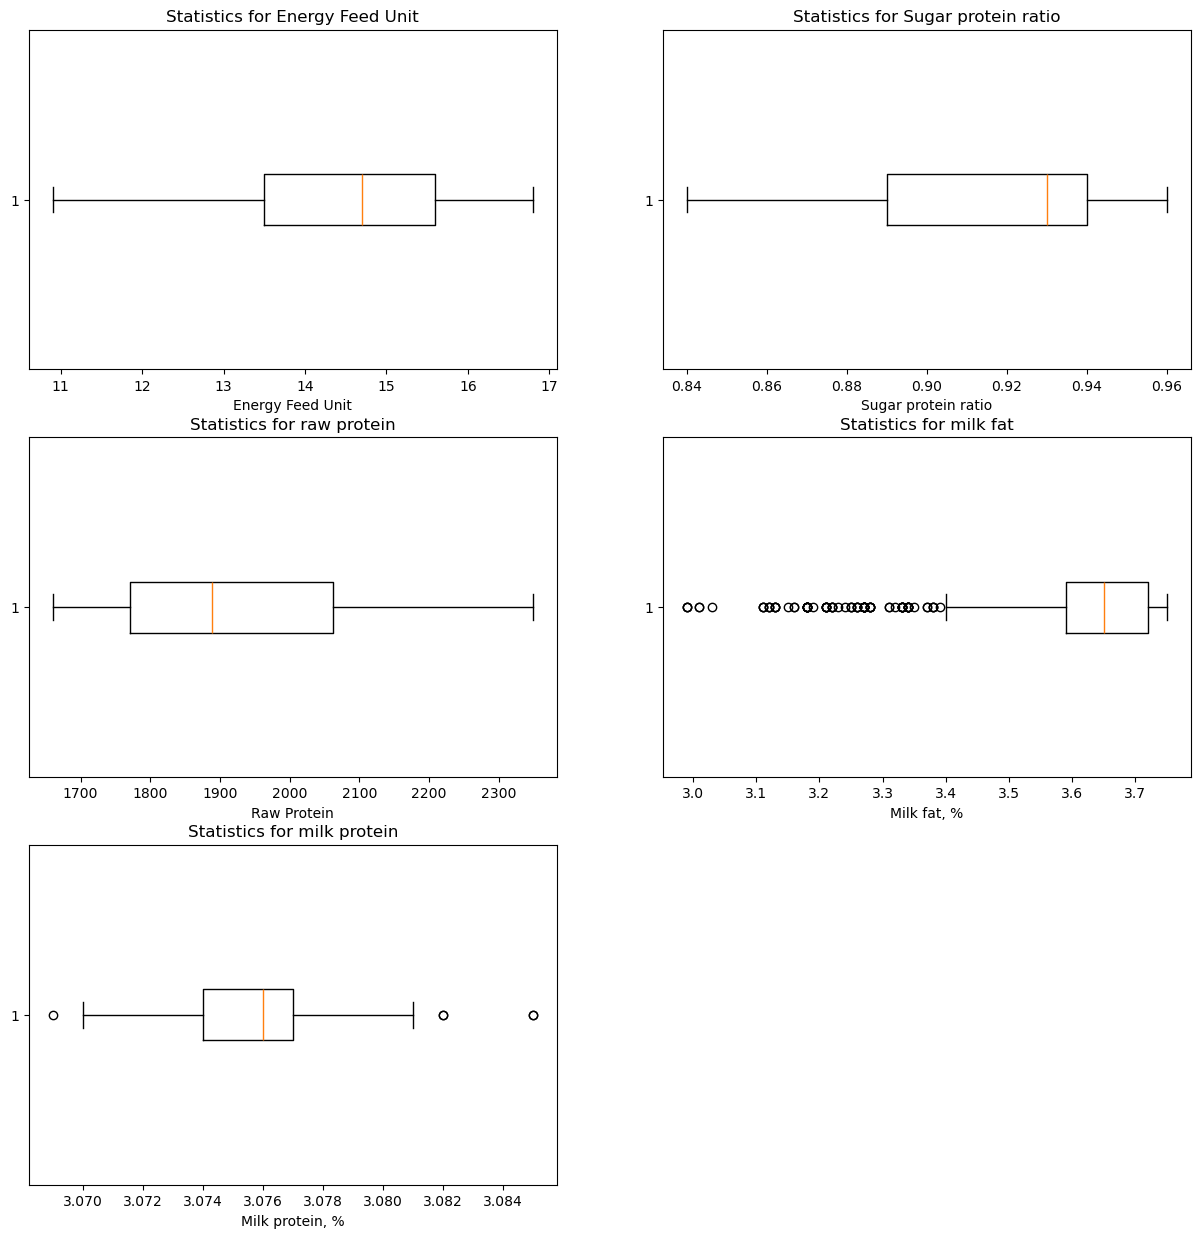

In [189]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
plt.boxplot(df_ferma_main['eke'], vert=False)  
plt.xlabel('Energy Feed Unit')
plt.title('Statistics for Energy Feed Unit')

plt.subplot(3, 2, 2)
plt.boxplot(df_ferma_main['spo'], vert=False)  
plt.xlabel('Sugar protein ratio')
plt.title('Statistics for Sugar protein ratio')

plt.subplot(3, 2, 3)
plt.boxplot(df_ferma_main['raw_protein'], vert=False)  
plt.xlabel('Raw Protein')
plt.title('Statistics for raw protein')

plt.subplot(3, 2, 4)
plt.boxplot(df_ferma_main['milk_fat'], vert=False)  
plt.xlabel('Milk fat, %')
plt.title('Statistics for milk fat')

plt.subplot(3, 2, 5)
plt.boxplot(df_ferma_main['milk_protein'], vert=False)  
plt.xlabel('Milk protein, %')
plt.title('Statistics for milk protein')


plt.show()

According to the statistics for protein and fat levels, we can see outliers. For fat content, values greater than 3.4%, and for protein, values less than 3.07% and greater than 3.08%.

Next, let's examine the categorical features.

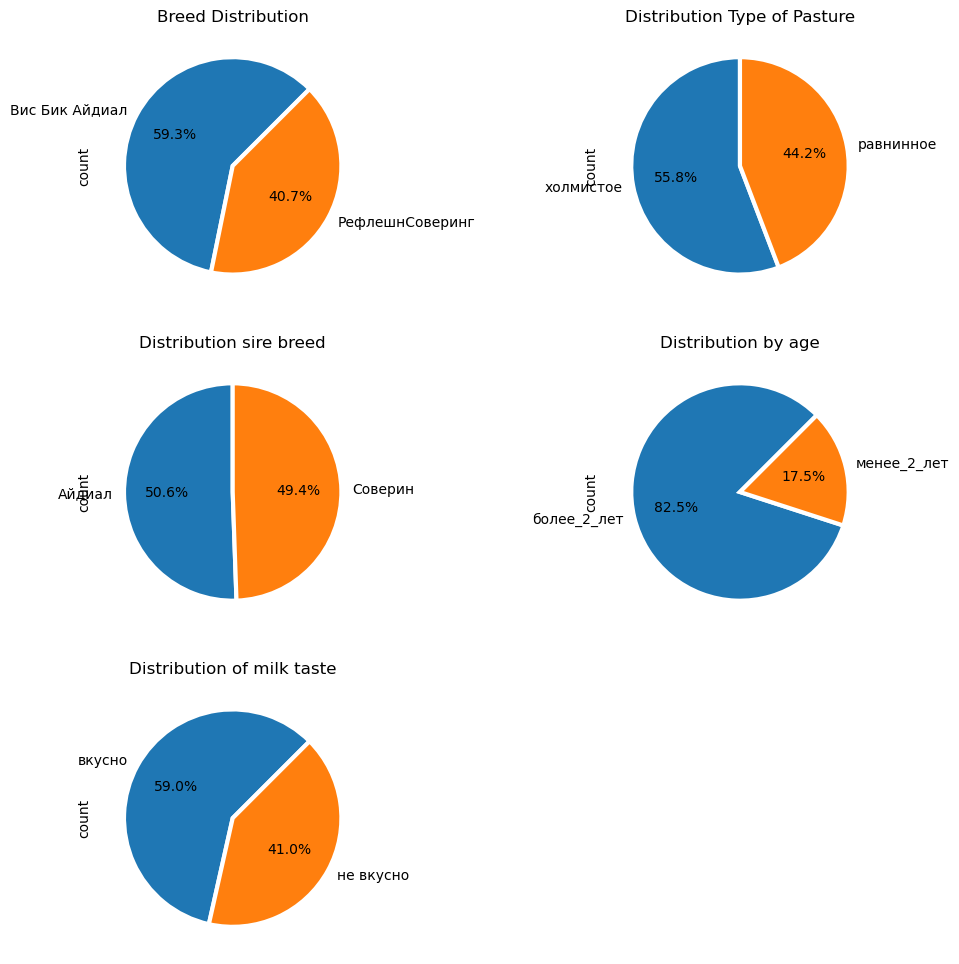

In [193]:
columns = [
    ('breed', 'Breed Distribution', 45),
    ('type_of_pasture', 'Distribution Type of Pasture', 90),
    ('sire_breed', 'Distribution sire breed', 90),
    ('age', 'Distribution by age', 45),
    ('milk_taste', 'Distribution of milk taste', 45)
]

plt.figure(figsize=(12, 12))

for i, (column, title, angle) in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    data = df_ferma_main[column].value_counts()
    data.plot(kind='pie', autopct='%1.1f%%', startangle=angle, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
    plt.title(title)

plt.show()

Breeds are distributed with a slight predominance of Vis Bik Ideal, the type of terrain is more often hilly, and the sire breeds are almost evenly distributed. 
About 82% of cows are older than 2 years, and the farmer considers around 60% of the milk to be tasty.

### Analysis of datasets df_cow_buy и df_ferma_dad

In [197]:
df_cow_buy.describe()

,milk_fat,milk_protein
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


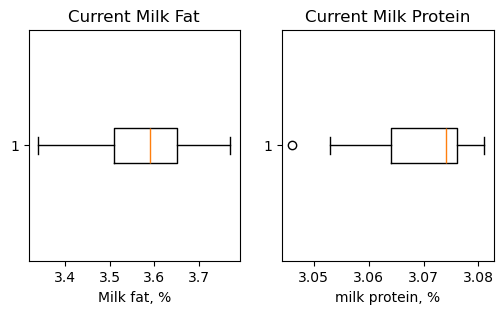

In [199]:
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.boxplot(df_cow_buy['milk_fat'], vert = False)  
plt.xlabel('Milk fat, %')
plt.title('Current Milk Fat')

plt.subplot(1, 2, 2)
plt.boxplot(df_cow_buy['milk_protein'], vert = False)  
plt.xlabel('milk protein, %')
plt.title('Current Milk Protein')
plt.show()

The current fat content ranges between 3.34% and 3.77%, and the protein content ranges between 3.04% and 3.08%. No outliers are observed.

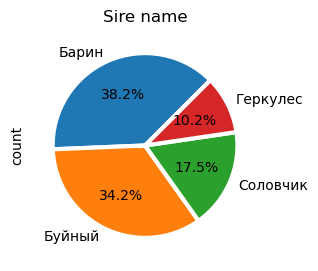

In [202]:
plt.figure(figsize=(3, 3))

age = df_ferma_dad['sire_name'].value_counts()
age.plot(kind='pie', autopct='%1.1f%%', startangle=45, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white'})
plt.title('Sire name')
plt.show()

Most often, the sires are named Barin and Buiny.

## Correlation analysis

In this section, we will perform a correlation analysis of the dataframe `df_ferma_main`.

### Correlation Coefficients

Let's start by examining the interactions between features. We'll construct a correlation matrix between the features.

In [209]:
data_corr = df_ferma_main[['yield', 'eke', 'raw_protein', 'spo', 'milk_fat', 'milk_protein' ]].corr()
data_corr

,yield,eke,raw_protein,spo,milk_fat,milk_protein
yield,1.000000,0.761778,0.446074,0.806162,0.598417,0.002966
eke,0.761778,1.000000,0.390669,0.743646,0.640344,-0.009380
raw_protein,0.446074,0.390669,1.000000,0.444443,0.360715,0.226185
spo,0.806162,0.743646,0.444443,1.000000,0.624457,0.073809
milk_fat,0.598417,0.640344,0.360715,0.624457,1.000000,-0.026901
milk_protein,0.002966,-0.009380,0.226185,0.073809,-0.026901,1.000000


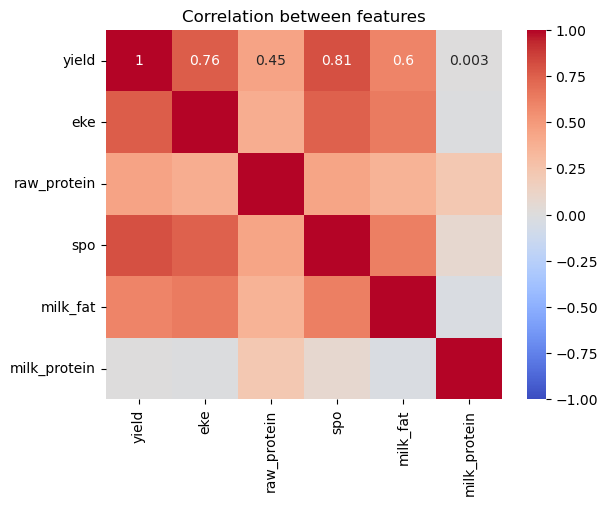

In [211]:
sns.heatmap(data_corr, annot=True, cmap='coolwarm', vmin=-1)
plt.title('Correlation between features')
plt.show()

**Conclusion:**
- There is a high correlation of 0.81 between Milk Yield and SPO.
- There is also a correlation of 0.76 between Milk Yield and EKE.

- There is a correlation of 0.74 between SPO and EKE.
- There is a correlation of 0.64 between EKE and Fat Content.
- There is a correlation of 0.62 between SPO and Fat Content.

We consider there to be multicollinearity if the correlation is above 0.9. Such a situation was not found.

### Scatter Plot for Milk Yield and All Quantitative Features

#### Yield and EKE

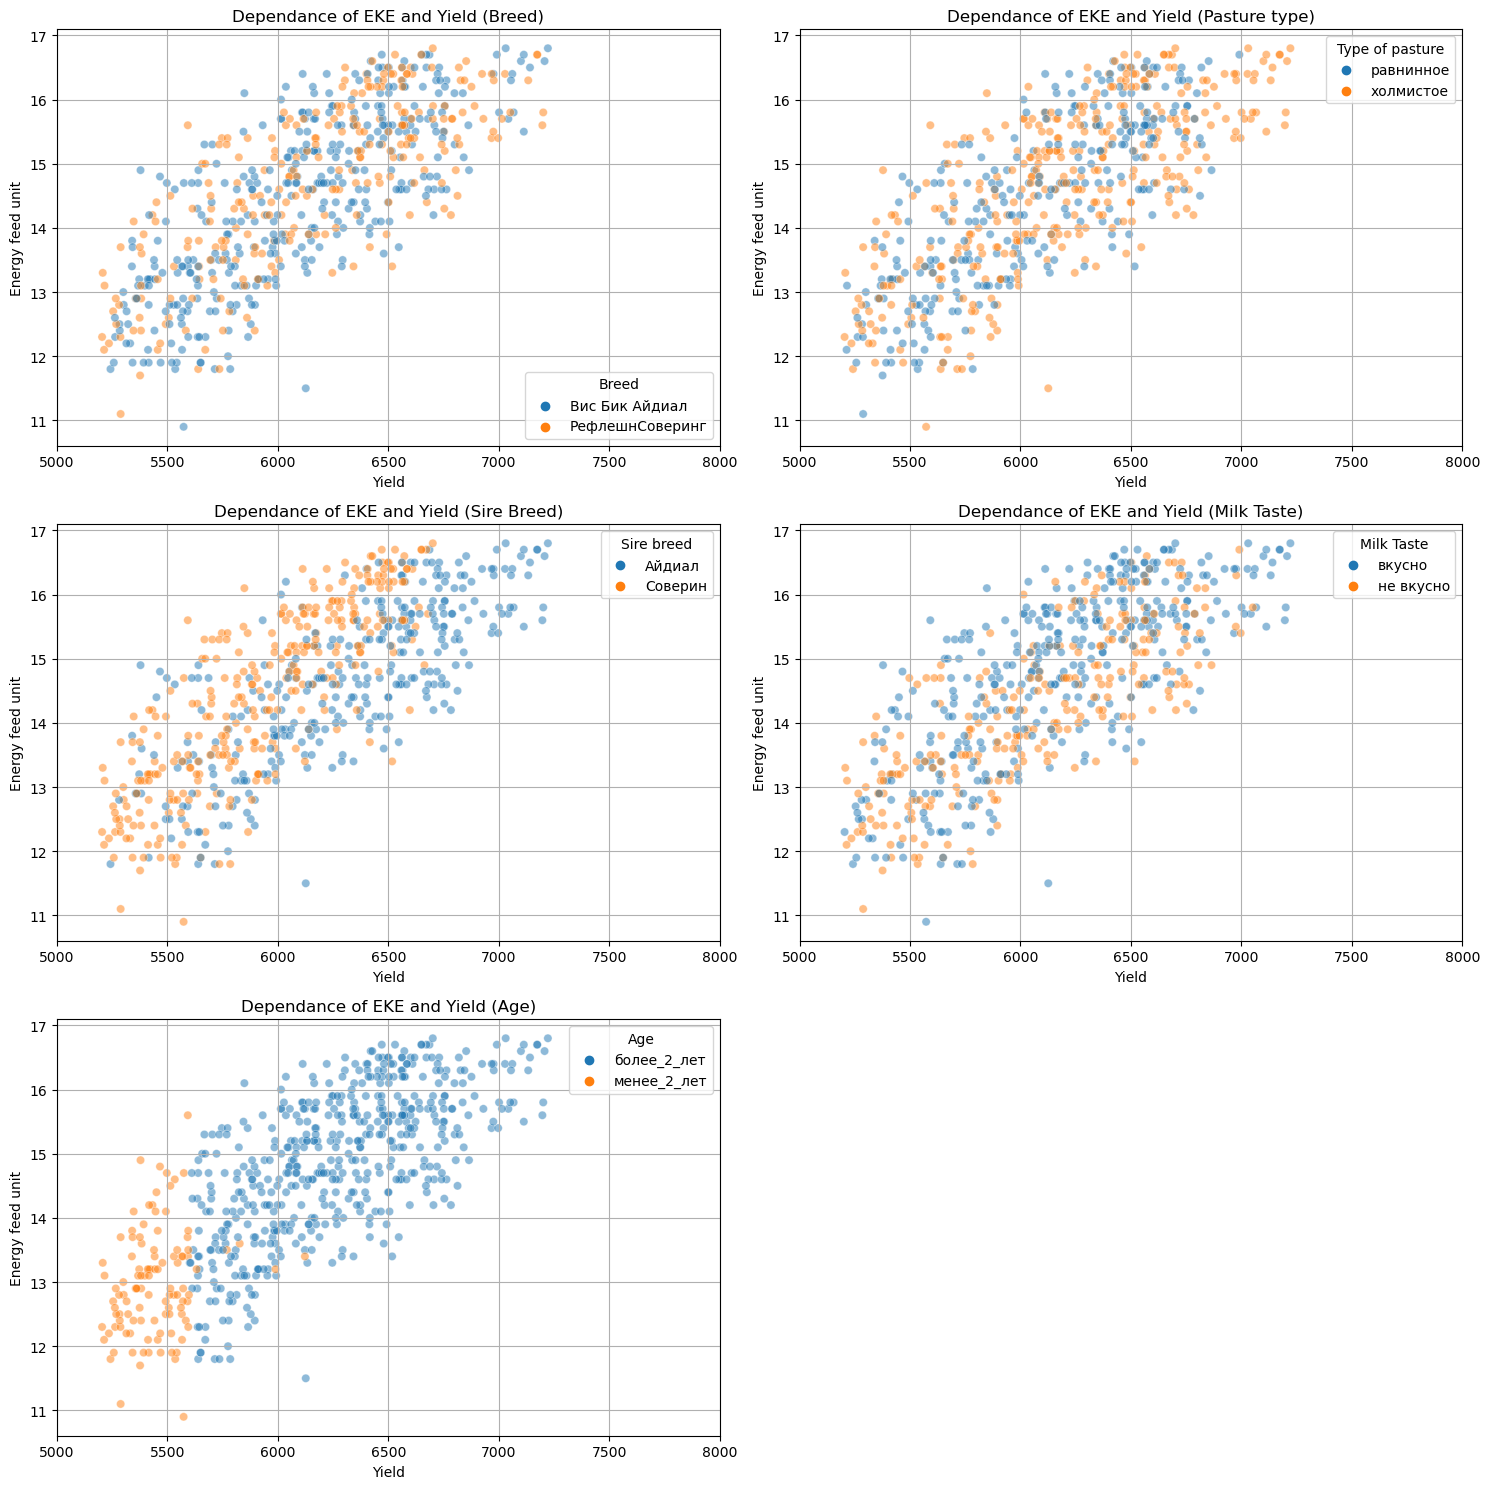

In [216]:
hues = ["breed", "type_of_pasture", "sire_breed", "milk_taste", "age"]
titles = [
    "Dependance of EKE and Yield (Breed)",
    "Dependance of EKE and Yield (Pasture type)",
    "Dependance of EKE and Yield (Sire Breed)",
    "Dependance of EKE and Yield (Milk Taste)",
    "Dependance of EKE and Yield (Age)"
]
legends = ["Breed", "Type of pasture", "Sire breed", "Milk Taste", "Age"]

plt.figure(figsize=(15, 15))


for i, (hue, title, legend) in enumerate(zip(hues, titles, legends), start=1):
    plt.subplot(3, 2, i)
    plt.grid(True)
    sns.scatterplot(
        data=df_ferma_main,
        x="yield",
        y="eke",
        hue=hue,
        alpha=0.5
    )
    plt.ylabel('Energy feed unit')
    plt.xlabel('Yield')
    plt.title(title)
    plt.xlim(5000, 8000)
    plt.legend(title=legend)

plt.tight_layout()
plt.show()

**Conclusion:**
- Between EKE and Milk Yield, there appears to be a relationship that is somewhere between linear and quadratic. The curve resembles a parabola branch, indicative of a quadratic function graph.
- For the categories of breed, type of pasture, and milk taste, as Milk Yield increases, EKE also increases. The data in these categories are distributed almost evenly, as can be seen from the number of orange and blue dots on the graph.
- A slightly different picture can be observed for age and sire breed. Although the sire breeds are represented 50/50, it is evident that the Ideal breed is more influenced by EKE, leading to an increase in Milk Yield. The Sovereign breed is less influenced but still shows a linear relationship.
- Age: It is evident that many cows are older than 2 years, and their Milk Yield and EKE are significantly higher than those of younger cows. It can be assumed that younger cows do not eat as much, resulting in lower Milk Yields.

#### Yield and raw protein

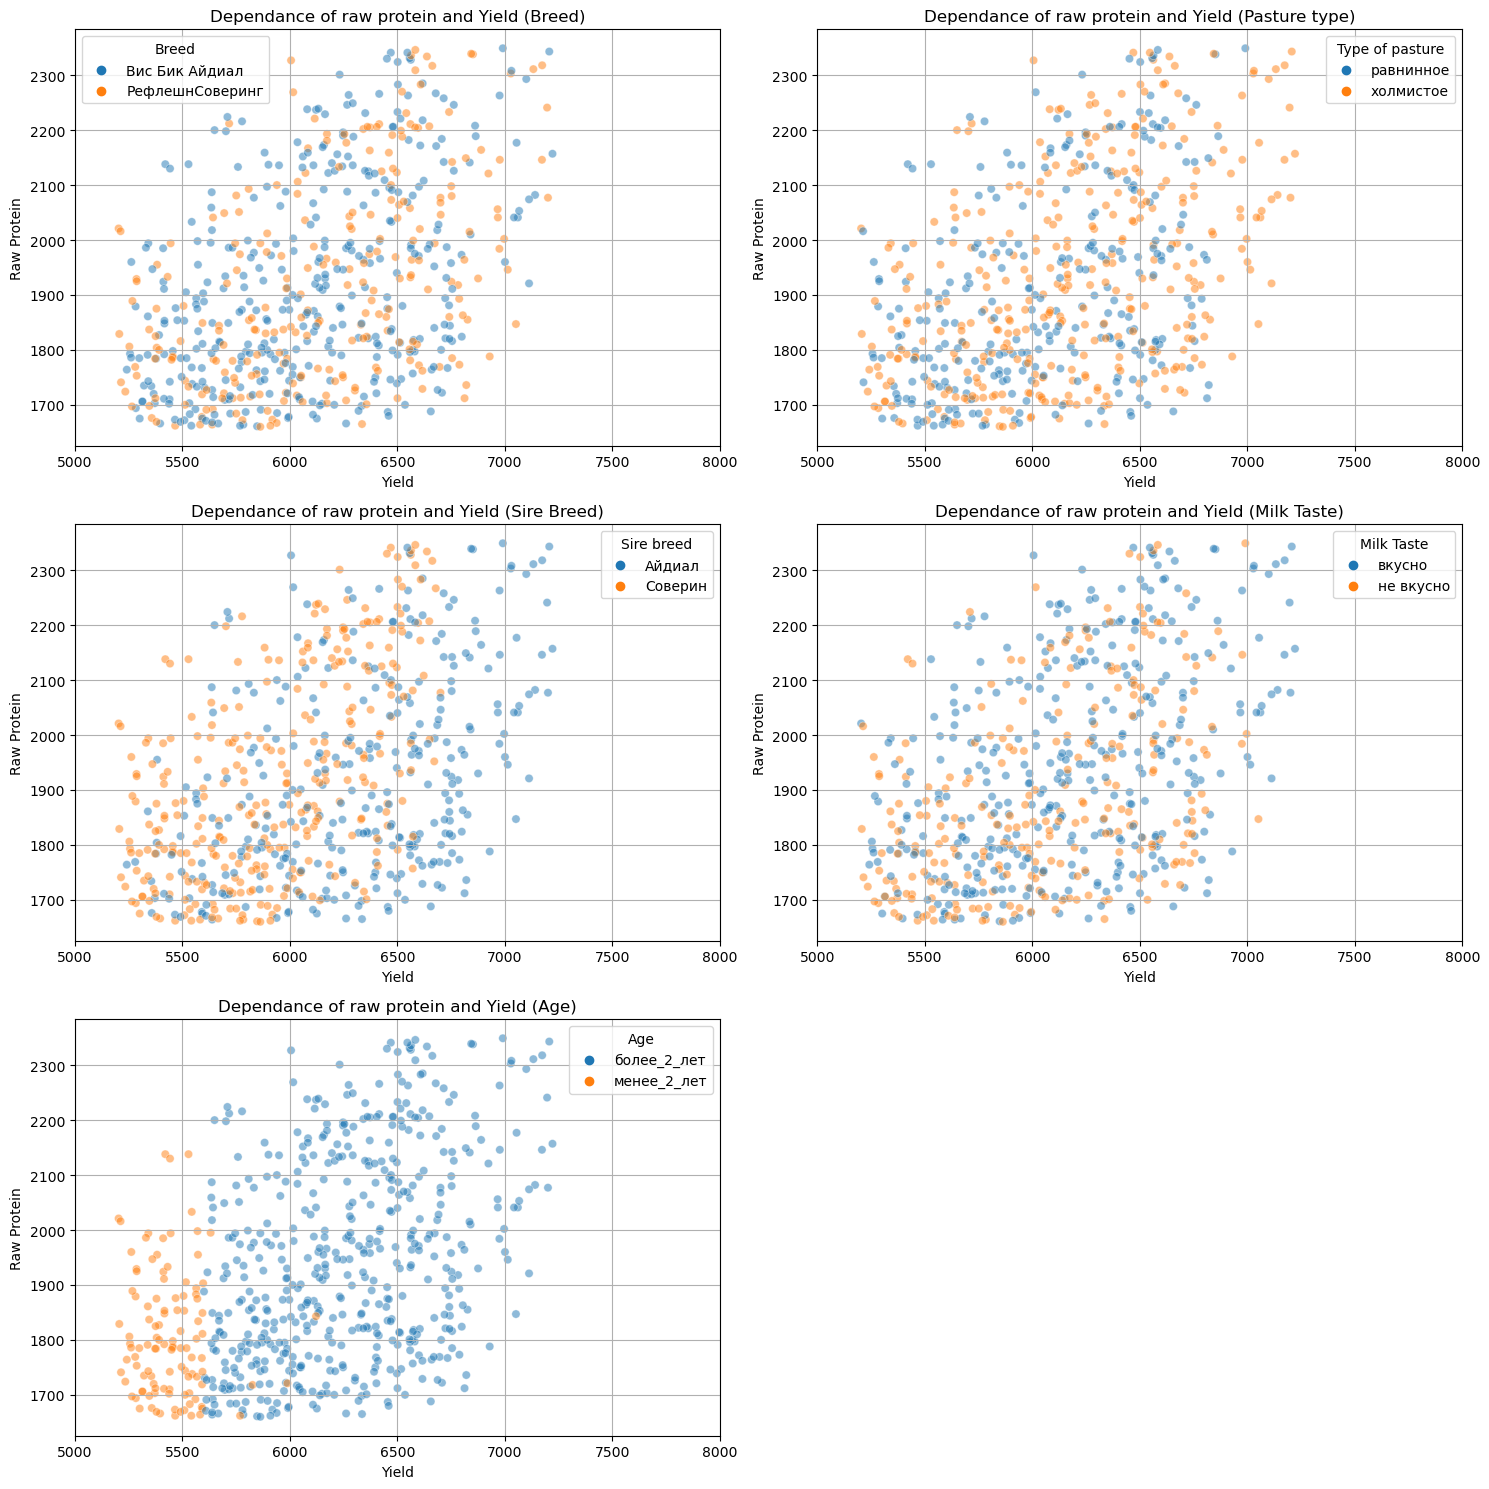

In [220]:
hues = ["breed", "type_of_pasture", "sire_breed", "milk_taste", "age"]
titles = [
     "Dependance of raw protein and Yield (Breed)",
    "Dependance of raw protein and Yield (Pasture type)",
    "Dependance of raw protein and Yield (Sire Breed)",
    "Dependance of raw protein and Yield (Milk Taste)",
    "Dependance of raw protein and Yield (Age)"
]
legends = ["Breed", "Type of pasture", "Sire breed", "Milk Taste", "Age"]

plt.figure(figsize=(15, 15))


for i, (hue, title, legend) in enumerate(zip(hues, titles, legends), start=1):
    plt.subplot(3, 2, i)
    plt.grid(True)
    sns.scatterplot(
        data=df_ferma_main,
        x="yield",
        y="raw_protein",
        hue=hue,
        alpha=0.5
    )
    plt.ylabel('Raw Protein')
    plt.xlabel('Yield')
    plt.title(title)
    plt.xlim(5000, 8000)
    plt.legend(title=legend)

plt.tight_layout()
plt.show()

**Conclusion:**
- Between raw protein and milk yield, a weak linear relationship can be observed.
- The points are widely dispersed.
- For the categories of breed, type of pasture, and milk taste, a small but uniform relationship can be seen as milk yield increases. The data in these categories are distributed almost evenly, as indicated by the number of orange and blue dots on the graph.
- A slightly different picture, similar to EKE, can be observed for age and sire breed. Although the sire breeds are represented 50/50, it is evident that the Ideal breed receives more raw protein in the feed, leading to an increase in milk yield. The Sovereign breed receives less raw protein.
- Age: It is evident that many cows are older than 2 years, and their milk yields and the proportion of raw protein in their feed are significantly higher than those of younger cows. It can be assumed that younger cows do not eat as much, resulting in lower milk yields.

#### Yield and SPO 

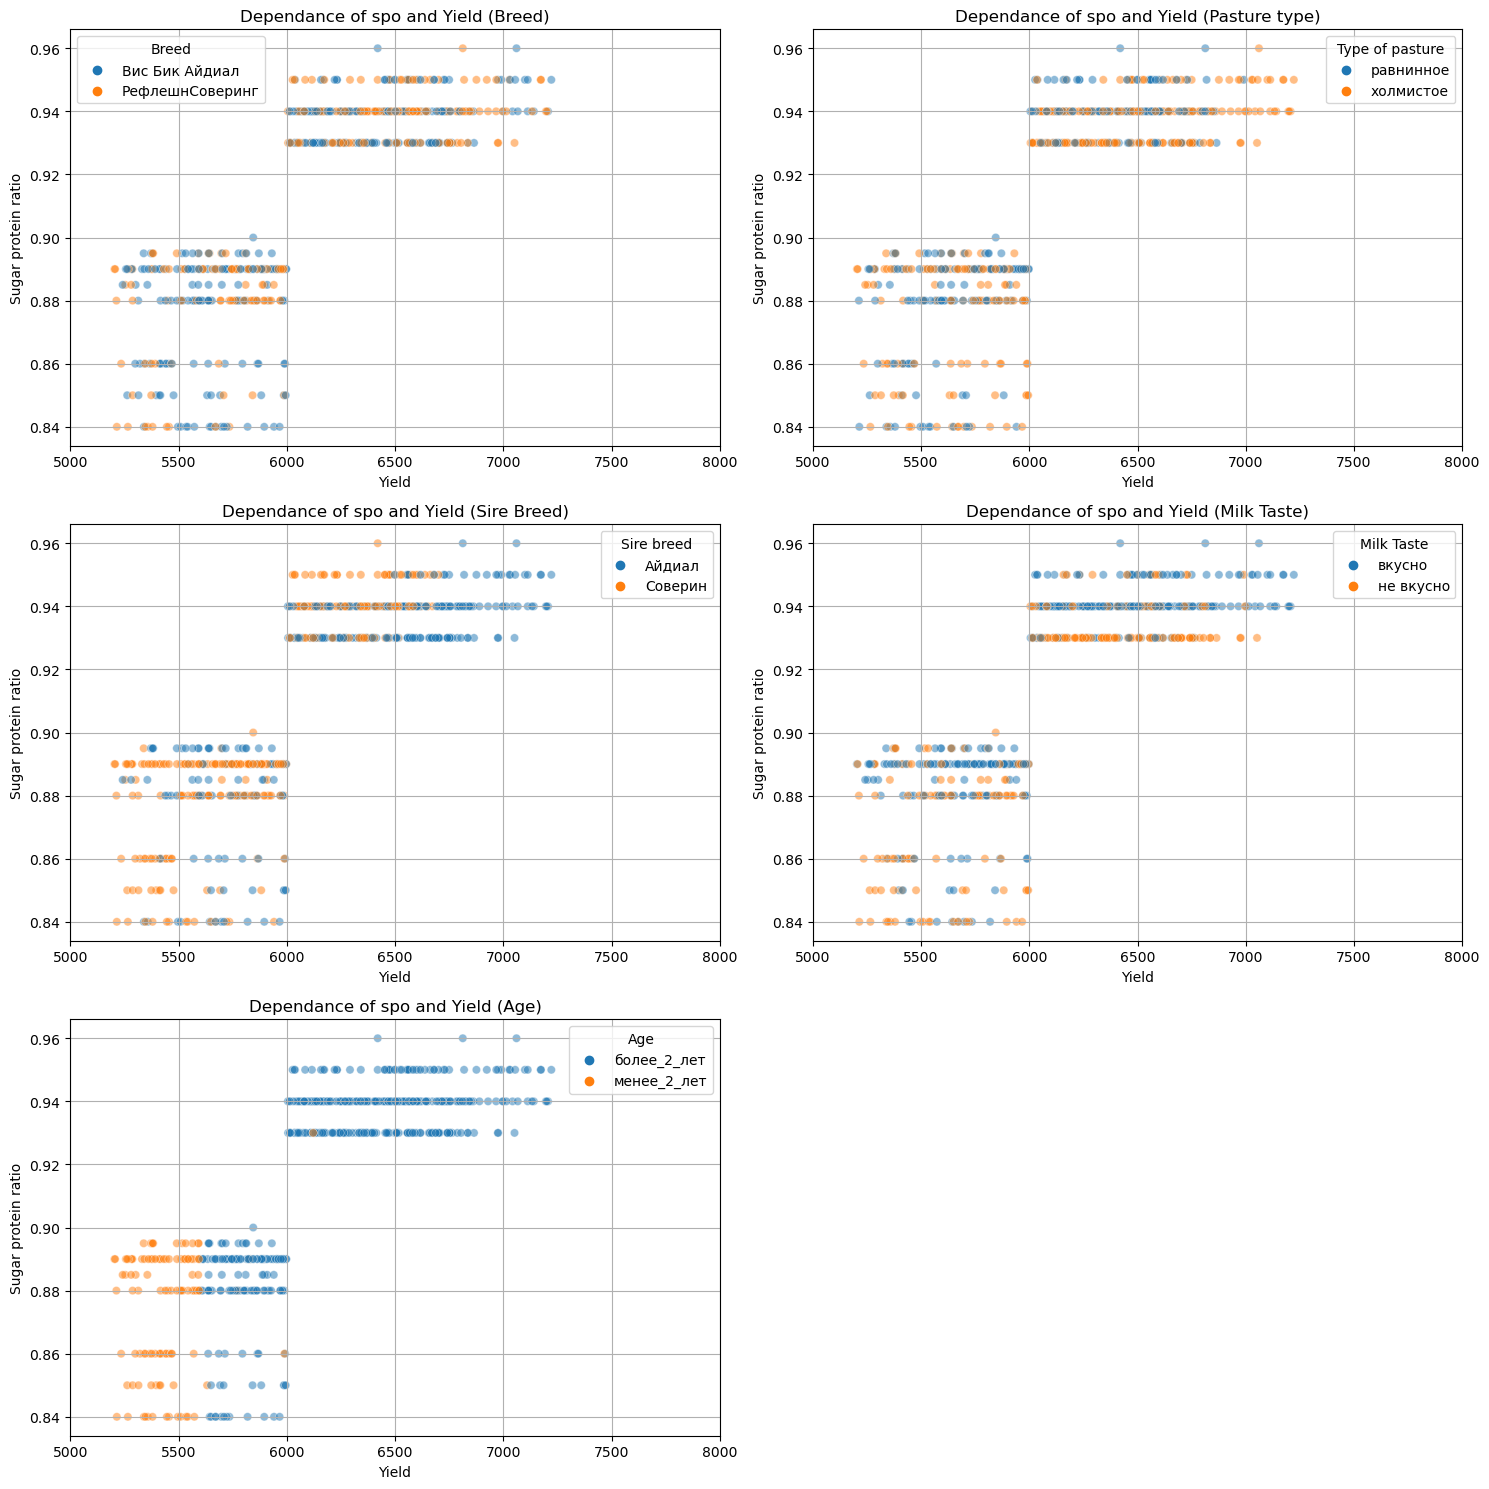

In [224]:
hues = ["breed", "type_of_pasture", "sire_breed", "milk_taste", "age"]
titles = [
    "Dependance of spo and Yield (Breed)",
    "Dependance of spo and Yield (Pasture type)",
    "Dependance of spo and Yield (Sire Breed)",
    "Dependance of spo and Yield (Milk Taste)",
    "Dependance of spo and Yield (Age)"
]
legends = ["Breed", "Type of pasture", "Sire breed", "Milk Taste", "Age"]

plt.figure(figsize=(15, 15))


for i, (hue, title, legend) in enumerate(zip(hues, titles, legends), start=1):
    plt.subplot(3, 2, i)
    plt.grid(True)
    sns.scatterplot(
        data=df_ferma_main,
        x="yield",
        y="spo",
        hue=hue,
        alpha=0.5
    )
    plt.ylabel('Sugar protein ratio')
    plt.xlabel('Yield')
    plt.title(title)
    plt.xlim(5000, 8000)
    plt.legend(title=legend)

plt.tight_layout()
plt.show()

**Conclusion:**
- There is a relationship between SPO and milk yield across all categorical features.
- In this case, the data is divided into clusters ranging from 0.86 to 0.96 percent. Therefore, the graphs differ from previous ones and no longer represent a linear relationship.
- For the categories of breed, type of pasture, and milk taste, a small dependence can be seen as milk yield increases. The data in these categories are distributed almost evenly, as indicated by the number of orange and blue dots on the graph.
- A slightly different picture can be observed for age and sire breed. Although the sire breeds are represented 50/50, it is evident that the Ideal breed consumes more feed with SPO, resulting in a higher milk yield. The Sovereign breed consumes less feed with SPO.
- Age: It is evident that many cows are older than 2 years, and their milk yields and the proportion of SPO in their feed are significantly higher than those of younger cows. It can be assumed that younger cows do not eat as much, resulting in lower milk yields.

#### Yield and milk fat

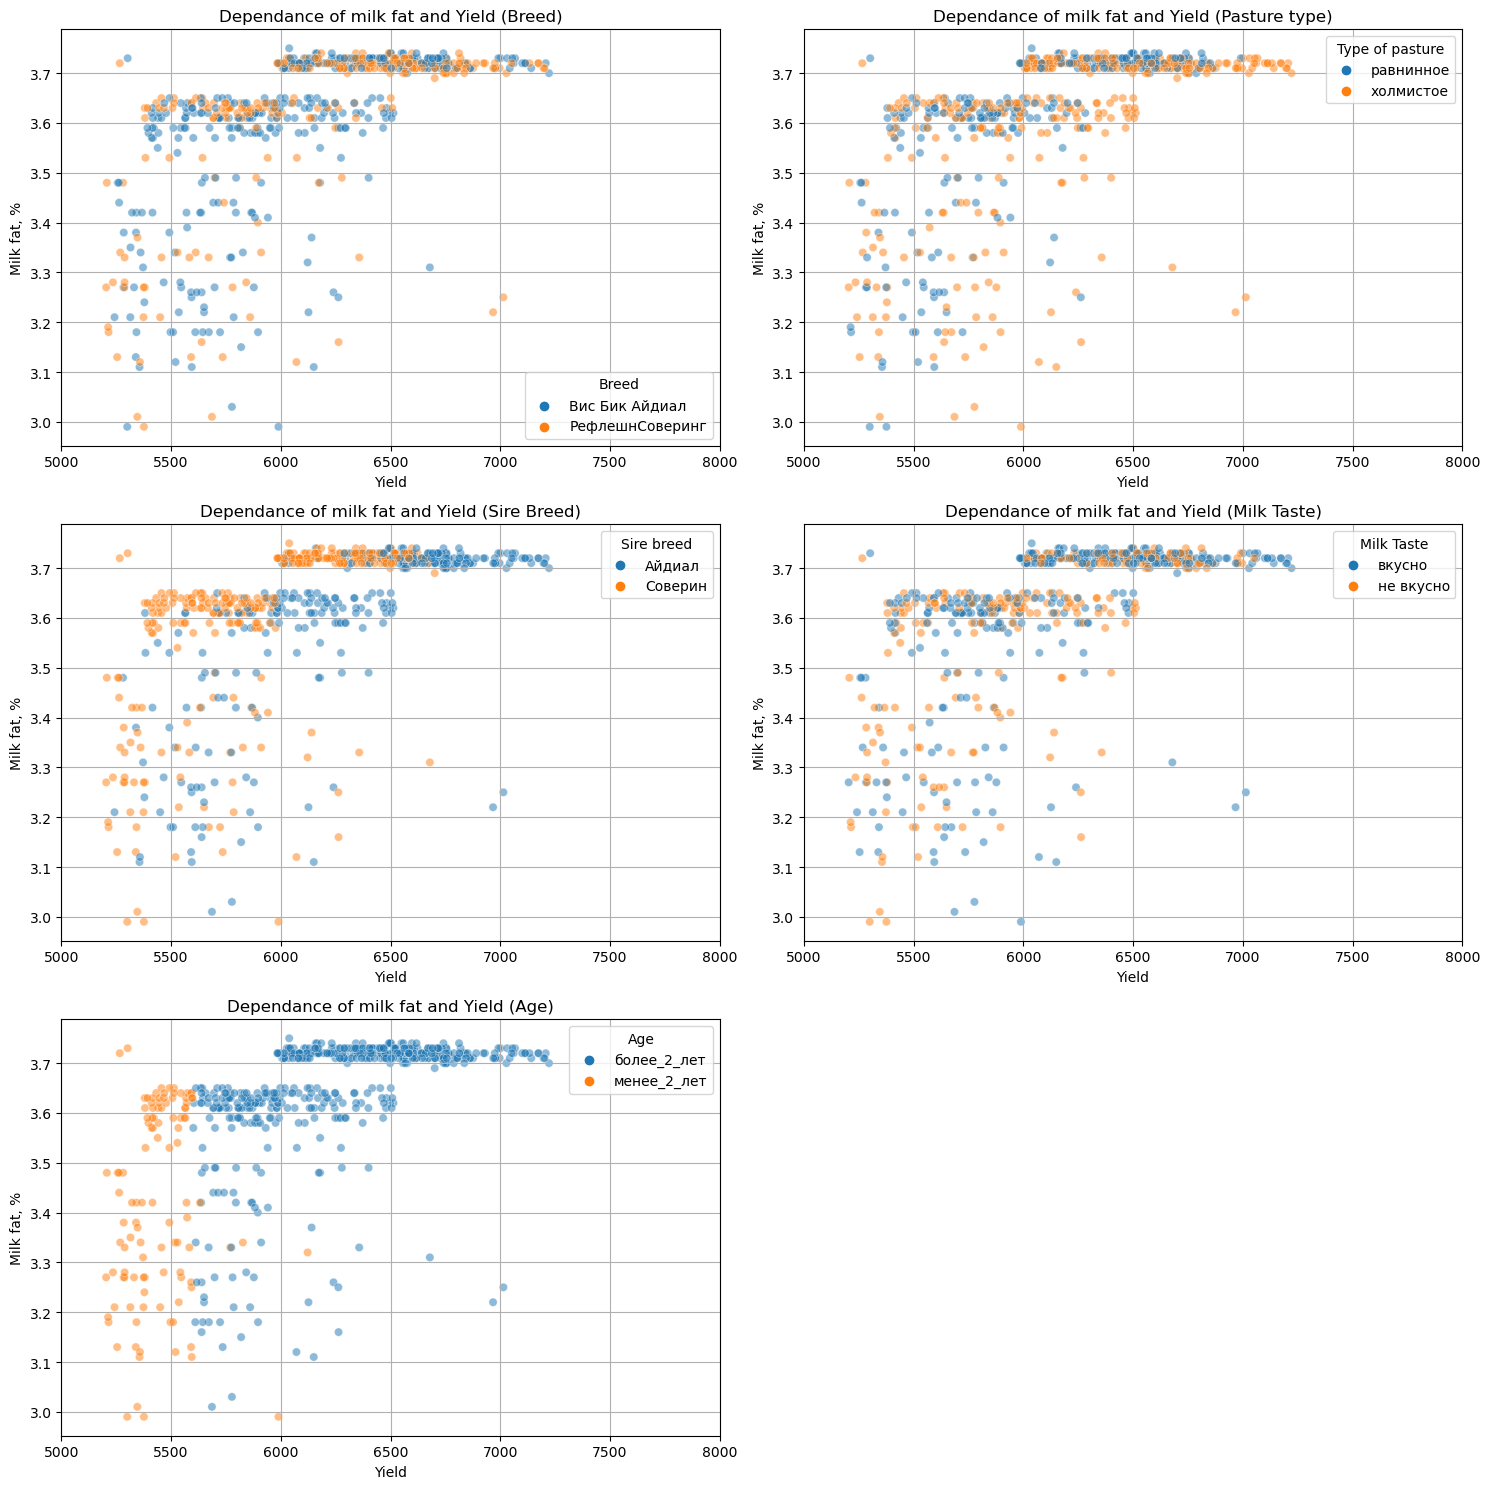

In [228]:
hues = ["breed", "type_of_pasture", "sire_breed", "milk_taste", "age"]
titles = [
    "Dependance of milk fat and Yield (Breed)",
    "Dependance of milk fat and Yield (Pasture type)",
    "Dependance of milk fat and Yield (Sire Breed)",
    "Dependance of milk fat and Yield (Milk Taste)",
    "Dependance of milk fat and Yield (Age)"
]
legends = ["Breed", "Type of pasture", "Sire breed", "Milk Taste", "Age"]

plt.figure(figsize=(15, 15))


for i, (hue, title, legend) in enumerate(zip(hues, titles, legends), start=1):
    plt.subplot(3, 2, i)
    plt.grid(True)
    sns.scatterplot(
        data=df_ferma_main,
        x="yield",
        y="milk_fat",
        hue=hue,
        alpha=0.5
    )
    plt.ylabel('Milk fat, %')
    plt.xlabel('Yield')
    plt.title(title)
    plt.xlim(5000, 8000)
    plt.legend(title=legend)

plt.tight_layout()
plt.show()

**Conclusion:**
- There is a relationship between milk fat content and milk yield across all categorical features, but it does not exhibit a clear linear pattern.
- The main concentration of data is in the fat content range of 3.6%-3.8%.
- It is also evident that milk yields from 5500 kg to 6500 kg have a fat content of about 3.6%, while yields from 6000 kg to 7200 kg have a fat content of about 3.8%.
- For the categories of breed, type of pasture, and milk taste, the data is distributed almost evenly, as indicated by the number of orange and blue dots on the graph.
- A slightly different picture can be observed for age and sire breed. Although the sire breeds are represented 50/50, it is evident that the Ideal breed has higher fat content at higher milk yields compared to the Sovereign breed.
- Age: It is evident that many cows are older than 2 years, and their milk fat content and yields are higher than those of younger cows. It can be assumed that younger cows are not yet capable of producing high yields, and their milk fat content is lower.

#### Yield and milk protein

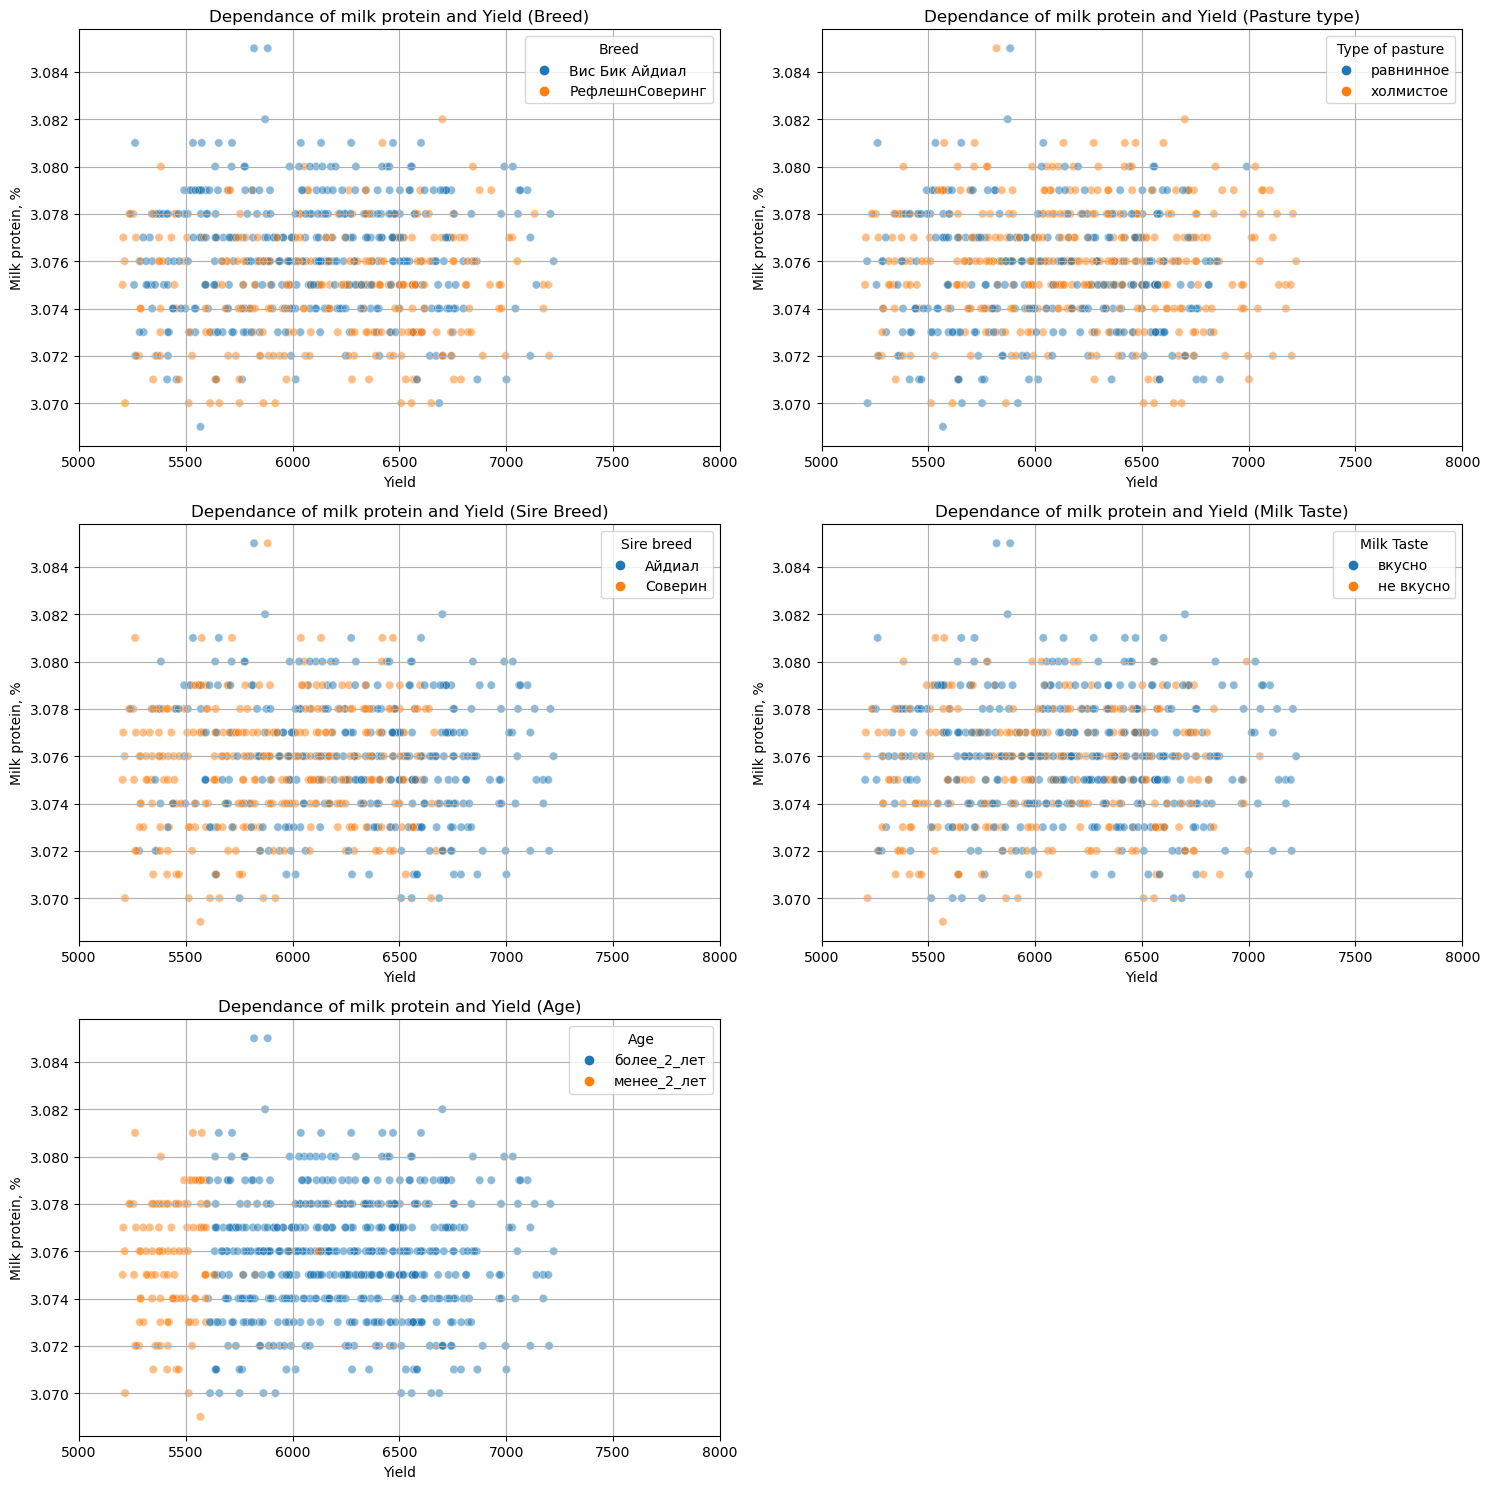

In [232]:
hues = ["breed", "type_of_pasture", "sire_breed", "milk_taste", "age"]
titles = [
    "Dependance of milk protein and Yield (Breed)",
    "Dependance of milk protein and Yield (Pasture type)",
    "Dependance of milk protein and Yield (Sire Breed)",
    "Dependance of milk protein and Yield (Milk Taste)",
    "Dependance of milk protein and Yield (Age)"
]
legends = ["Breed", "Type of pasture", "Sire breed", "Milk Taste", "Age"]

plt.figure(figsize=(15, 15))


for i, (hue, title, legend) in enumerate(zip(hues, titles, legends), start=1):
    plt.subplot(3, 2, i)
    plt.grid(True)
    sns.scatterplot(
        data=df_ferma_main,
        x="yield",
        y="milk_protein",
        hue=hue,
        alpha=0.5
    )
    plt.ylabel('Milk protein, %')
    plt.xlabel('Yield')
    plt.title(title)
    plt.xlim(5000, 8000)
    plt.legend(title=legend)

plt.tight_layout()
plt.show()

**Conclusion:**

- There is almost no dependency between milk protein content and milk yield across all categorical features, hence no linear relationship.
- The main concentration of data is in the protein content range of 3.06%-3.08% and is divided into clusters.
- For the categories of breed, type of pasture, and milk taste, the data is distributed almost evenly, as indicated by the number of orange and blue dots on the graph.
- A slightly different picture can be observed for age and sire breed. Although the sire breeds are represented 50/50, it is evident that the Ideal breed has higher protein content at higher milk yields compared to the Sovereign breed.
- Age: It is evident that many cows are older than 2 years, and their milk protein content and yields are higher than those of younger cows. It can be assumed that younger cows are not yet capable of producing high yields, and their milk protein content is lower.

Let’s check the dataset for multicollinearity using the Variance Inflation Factor (VIF). A VIF value above 5 requires attention, and a value above 10 suggests serious consideration for changes in the model.

In [236]:
quantitative_features = ['yield', 'spo', 'eke', 'milk_fat', 'milk_protein', 'raw_protein']
vif_data = df_ferma_main[quantitative_features]
vif_data = vif_data.assign(const=1)
vif = pd.DataFrame({
    'feature': quantitative_features,
    'VIF': [variance_inflation_factor(vif_data.values, i) for i in range(len(quantitative_features))]})
display(vif)

,feature,VIF
0,yield,3.545331
1,spo,3.462383
2,eke,2.931198
3,milk_fat,1.885875
4,milk_protein,1.088334
5,raw_protein,1.374469


### Overall Conclusion on Feature Correlation


**Linear and Nonlinear Relationships**
- A slight linear relationship can be observed between milk yield and other quantitative features, specifically between milk yield and raw protein.
- In other cases, linear relationships are mostly absent:
  - With EKE: Quadratic relationship (curved cloud).
  - With SPO: Clustered nature (several clouds).
  - With protein: Very weak relationship.

**Multicollinearity**
- Based on the Variance Inflation Factor (VIF) and Pearson correlation coefficient checks, no multicollinearity was detected in this dataset.

## Training the Linear Regression Model

At this step, we will train three linear regression models.
**Target feature - milk yield**


### Selecting features for model training

### **First Model**

**Quantitative Features:** The following features will be included in the first model:
- EKE
- SPO
- Raw protein

**Categorical Features:** The decision is to include:
- Age
- Breed
- Sire breed

These features are chosen because their subgroups have the least overlap, as observed in the data analysis section where the breed was split 60% to 40% and age 17% to 83%. This may improve the model's performance. The type of pasture is too evenly distributed and overlapping, whereas the sire breed may biologically influence milk yield.
**Features for the first model: 'eke', 'spo', 'raw_protein', 'sire_breed', 'breed', 'age'**

### **Second Model**

**Eliminating Nonlinearity in EKE and SPO**
SPO values are nonlinear with respect to milk yield and are divided into two clusters with a boundary at 0.92. A new column will be created in `df_ferma_main` with binary values indicating whether the values are above or below the 0.92 boundary. This should eliminate the nonlinearity.
EKE has a quadratic relationship with milk yield. To address this, the EKE values will be squared.
**Features for the second model: 'eke_squared', 'spo_binary', 'raw_protein', 'sire_breed', 'breed', 'age'**

### **Third Model**

Add a new feature, the sire's name, from the `df_ferma_dad` dataframe.
**Features for the third model: 'eke_squared', 'spo_binary', 'raw_protein', 'sire_breed', 'breed', 'age', 'sire_name'**


### Model Building and Analysis:

Here we will perform the following actions:

1. Split the data into training and test sets
2. Encode categorical features and scale quantitative features
3. Train the model
4. Make predictions on the test set
5. Calculate the metrics R², MSE, MAE, and RMSE
6. Analyze the residuals by plotting histograms and scatter plots

Model training on features: ['eke', 'spo', 'raw_protein', 'sire_breed', 'breed', 'age']


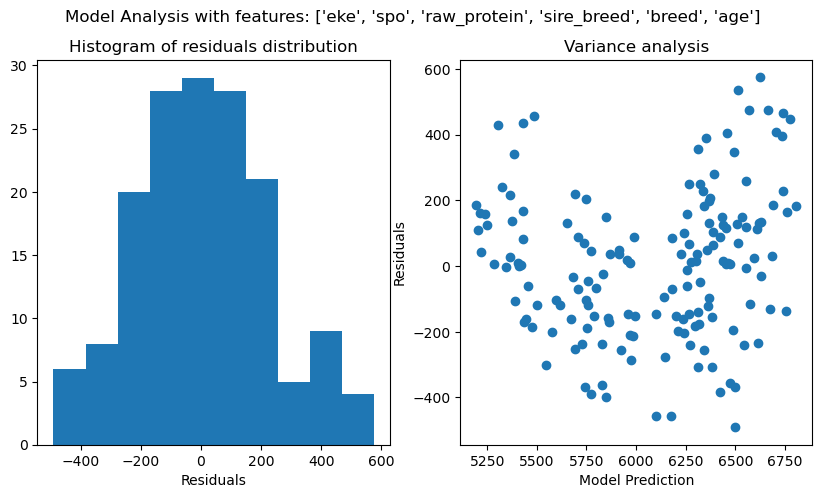

MSE: 49462.23825876771
MAE: 178.12693532206708
RMSE: 222.40107521945058
R2: 0.8194913034288155


Model training on features: ['eke_square', 'spo_binary', 'raw_protein', 'sire_breed', 'breed', 'age']


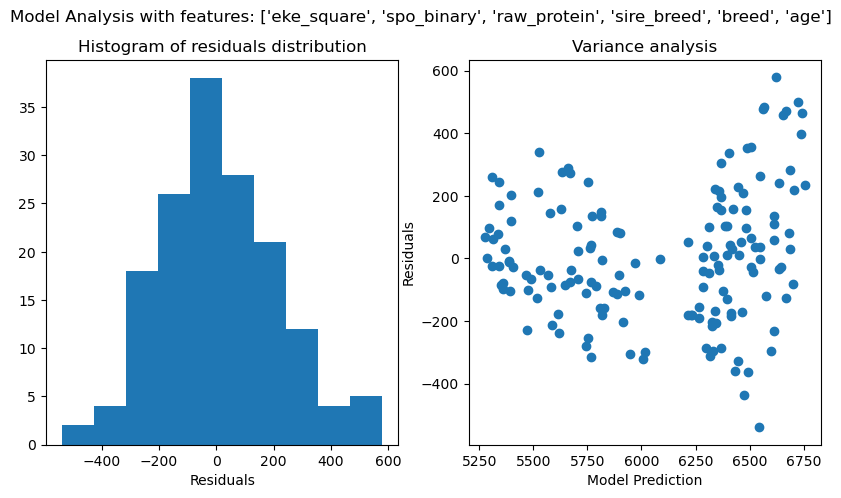

MSE: 42556.91064807003
MAE: 162.3004387251158
RMSE: 206.2932637001752
R2: 0.8446917741370552


Model training on features: ['eke_square', 'spo_binary', 'raw_protein', 'sire_breed', 'breed', 'age', 'sire_name']


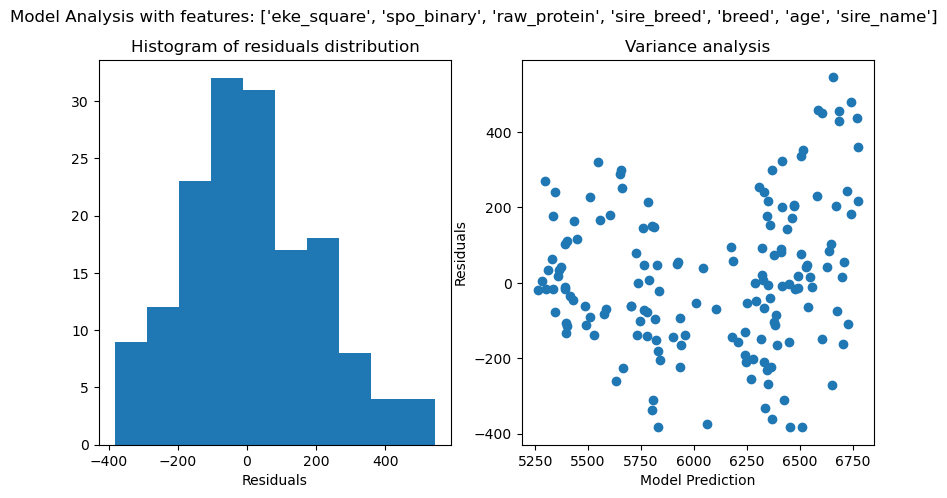

MSE: 37893.0181344111
MAE: 152.9665552437627
RMSE: 194.66129079611872
R2: 0.8617122970293739




,Features,MSE,MAE,RMSE,R2
0,"[eke, spo, raw_protein, sire_breed, breed, age]",49462.238259,178.126935,222.401075,0.819491
1,"[eke_square, spo_binary, raw_protein, sire_bre...",42556.910648,162.300439,206.293264,0.844692
2,"[eke_square, spo_binary, raw_protein, sire_bre...",37893.018134,152.966555,194.661291,0.861712


In [246]:
# merge ferma_dad с ferma_main
df_combined = pd.merge(df_ferma_main, df_ferma_dad, on='id', how='left')

# Creating new features to eliminate nonlinearity
df_combined['eke_square'] = df_combined['eke'] ** 2
threshold = 0.92
df_combined['spo_binary'] = df_combined['spo'].apply(lambda x: 1 if x > threshold else 0)

# create constant RANDOM_STATE
RANDOM_STATE = 42

# list of features for first, second and third model 
features_list = [
    ['eke', 'spo', 'raw_protein', 'sire_breed', 'breed', 'age'],
    ['eke_square', 'spo_binary', 'raw_protein', 'sire_breed', 'breed', 'age'],
    ['eke_square', 'spo_binary', 'raw_protein', 'sire_breed', 'breed', 'age', 'sire_name']
]

# Target feature 
y = df_combined['yield']

results = []
## Initialize variables for quantile calculation
third_set_y_train = None
third_set_predictions = None

## Initialize variables for predicting milk yield in cow_buy
third_set_model = None
third_set_encoder = None
third_set_scaler = None


for col_name in features_list:
    print(f"Model training on features: {col_name}")

    # Splitting the data into input features and target variable
    X = df_combined[col_name]

    # # Split the data into training and test sets, with a fixed random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

    # Define categorical and quantitative features based on the presence of columns
    cat_col_names = [col for col in ['sire_breed', 'breed', 'age', 'sire_name'] if col in col_name]
    num_col_names = [col for col in ['eke', 'raw_protein', 'eke_square','spo', 'spo_binary'] if col in col_name]

    # OneHotEncoder for categorical features
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    if cat_col_names:
        X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
        X_test_ohe = encoder.transform(X_test[cat_col_names])
        encoder_col_names = encoder.get_feature_names_out(cat_col_names)
    else:
        X_train_ohe = np.empty((X_train.shape[0], 0))
        X_test_ohe = np.empty((X_test.shape[0], 0))
        encoder_col_names = []

    # StandardScaler for quantitative features
    scaler = StandardScaler()
    if num_col_names:
        X_train_scaled = scaler.fit_transform(X_train[num_col_names])
        X_test_scaled = scaler.transform(X_test[num_col_names])
    else:
        X_train_scaled = np.empty((X_train.shape[0], 0))
        X_test_scaled = np.empty((X_test.shape[0], 0))

    # Creating a DataFrame from encoded and scaled data
    X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=num_col_names)

    # merging enchoded data to dataframe
    X_train_final = pd.concat([X_train_ohe_df, X_train_scaled_df], axis=1)
    X_test_final = pd.concat([X_test_ohe_df, X_test_scaled_df], axis=1)

    # Initialization and training of a linear regression model
    model_lr = LinearRegression()
    model_lr.fit(X_train_final, y_train)

    # predictions on test data
    predictions = model_lr.predict(X_test_final)
    
    #save results of the third model 
    if col_name ==  ['eke_square', 'spo_binary', 'raw_protein', 'sire_breed', 'breed', 'age', 'sire_name']:
        third_set_y_train = y_train
        third_set_predictions = model_lr.predict(X_train_final)
        third_set_model = model_lr
        third_set_encoder = encoder
        third_set_scaler = scaler

    # Model evaluation 
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = model_lr.score(X_test_final, y_test)

    # Saving the results
    results.append({
        'Features': col_name, 
        'MSE': mse, 
        'MAE': mae, 
        'RMSE': rmse,
        'R2': r2
    })

    # Calcualte residuals
    residuals = y_test - predictions
    
    # create graphics
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    # Histogram of residuals distribution
    axes[0].hist(residuals)
    axes[0].set_title('Histogram of residuals distribution')
    axes[0].set_xlabel('Residuals')

    # Scatter plot (variance analysis)
    axes[1].scatter(predictions, residuals)
    axes[1].set_xlabel('Model Prediction')
    axes[1].set_ylabel('Residuals')
    axes[1].set_title('Variance analysis')

    plt.suptitle(f'Model Analysis with features: {col_name}')
    plt.show()

    # results display
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")
    print("\n")

# conclusions
results_df = pd.DataFrame(results)
display(results_df)

### Analysis of metrics and model selection

**R2**
- The best R2 coefficient is **0.86** for the third model, closest to 1.
- Following that, the second model has a coefficient of 0.84.
- The first model has the lowest coefficient at 0.81.

**MSE and RMSE**
These metrics indicate how much the model's predictions deviate from actual values, with RMSE particularly useful as it shows the deviation in the actual unit - kilograms.
- The third model has the best result with an MSE of 194 kg.
- Slightly worse is the second model with 206 kg.
- The first model performs worst with 222 kg.

**MAE**
- The lowest MAE value is 152 for the third model, indicating it provides the best predictions for the target variable.
- The second model ranks second with 162.
- The first model has the highest MAE at 178.

**Residual Distribution**

**Histogram**
- The residual distributions of all three models approximate a normal distribution.
- The distribution is slightly skewed to the left of the mean, suggesting the models might tend to overpredict.
- However, the histograms of the second and third models show better distribution than the first, albeit with slight deviations.

**Scatter Plot**
- The variance is non-constant, showing patterns that indicate dependencies between the data.
- The variance has improved for the second and especially the third model, showing a more consistent distribution. However, there are still noticeable clusters.

**Model Selection**
- Among the three models, the **third model** stands out as the highest quality choice.
- It exhibits the best R2, MAE, and RMSE metrics.
- Its histogram plot shows a distribution close to normal.
- Additionally, it demonstrates a more consistent variance compared to the first and second models.


### Confidence interval calculation

The confidence interval shows in what range the results of sample observations will be located. A wide confidence interval indicates that the estimate is imprecise, while a narrow one indicates a more precise estimate.

In [252]:
# # Let's calculate the residuals and quantiles of the model errors on the training data for the third set of features.
train_residuals = third_set_y_train - third_set_predictions

# Quantiles of the model errors on the training data
quantiles = np.percentile(train_residuals, [2.5, 97.5])
print(f'2.5% quantile: {quantiles[0]}, 97.5% quantile: {quantiles[1]}')


2.5% quantile: -348.85564382144184, 97.5% quantile: 367.641240686743


The result shows that 97.5% of errors lie within the range of -348 to 367. This range is relatively narrow (considering our yield ranges from 5000 to 7000 kg), indicating that the model performs well in prediction.

### Calculation of yield prediction

Let's add the values of EKE, SPO, and raw protein to `df_cow_buy`, increasing them by 5%.

In [257]:
# average calculation for features eke, spo and raw protein
mean_eke = df_ferma_main['eke'].mean()
mean_spo = df_ferma_main['spo'].mean()
mean_protein = df_ferma_main['raw_protein'].mean()

# increase mean value by 5%
mean_eke_increased = mean_eke * 1.05
mean_spo_increased = mean_spo * 1.05
mean_protein_increased = mean_protein * 1.05

# add increased values to the df_cow_buy
df_cow_buy['eke'] = mean_eke_increased
df_cow_buy['spo'] = mean_spo_increased
df_cow_buy['raw_protein'] = mean_protein_increased

df_cow_buy['eke_square'] = df_cow_buy['eke'] ** 2
df_cow_buy['spo_binary'] = df_cow_buy['spo'].apply(lambda x: 1 if x > threshold else 0)

display(df_cow_buy.head(3))

,breed,type_of_pasture,sire_breed,sire_name,milk_fat,milk_protein,age,eke,spo,raw_protein,eke_square,spo_binary
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,0.958772,2019.532273,233.205675,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.271073,0.958772,2019.532273,233.205675,1
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.271073,0.958772,2019.532273,233.205675,1


In [259]:

# prepate data of cow_buy
X_cow_buy_ohe = third_set_encoder.transform(df_cow_buy[cat_col_names])
encoder_col_names = third_set_encoder.get_feature_names_out(cat_col_names)

X_cow_buy_scaled = third_set_scaler.transform(df_cow_buy[num_col_names])

X_cow_buy_ohe_df = pd.DataFrame(X_cow_buy_ohe, columns=encoder_col_names)
X_cow_buy_scaled_df = pd.DataFrame(X_cow_buy_scaled, columns=num_col_names)

X_cow_buy_final = pd.concat([X_cow_buy_ohe_df, X_cow_buy_scaled_df], axis=1)

# get yield prediction cow_buy
predictions_cow_buy = third_set_model.predict(X_cow_buy_final)

# adding yield prediction column 
df_cow_buy['yield_prediction'] = predictions_cow_buy

display(df_cow_buy.head(3))


,breed,type_of_pasture,sire_breed,sire_name,milk_fat,milk_protein,...,eke,spo,raw_protein,eke_square,spo_binary,yield_prediction
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,...,15.271073,0.958772,2019.532273,233.205675,1,6518.520472
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,...,15.271073,0.958772,2019.532273,233.205675,1,6316.669659
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,...,15.271073,0.958772,2019.532273,233.205675,1,6327.952591


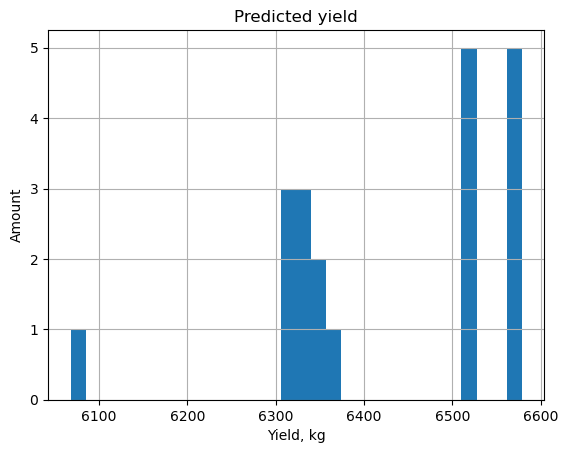

In [261]:
#plt.figure(figsize=(12, 12))
#plt.subplot(3, 2, 1)
df_cow_buy['yield_prediction'].hist(bins=30)
plt.title('Predicted yield')
plt.xlabel('Yield, kg')
plt.ylabel('Amount')
plt.show()

**Conclusion**
The predictions indicate that all 20 cows will yield more than 6000 kg of milk per year.

## **Training a logistic regression model**

At this step, we will train the dataset from ferma_main.csv using LogisticRegression. The target variable is **milk taste**.

In [266]:
display(df_combined.head(3))

,id,yield,eke,raw_protein,spo,breed,...,milk_protein,milk_taste,age,sire_name,eke_square,spo_binary
0,1,5863.0,14.2,1743,0.890,Вис Бик Айдиал,...,3.076,вкусно,более_2_лет,Буйный,201.64,0
1,2,5529.0,12.8,2138,0.890,Вис Бик Айдиал,...,3.079,вкусно,менее_2_лет,Соловчик,163.84,0
2,3,5810.0,14.0,1854,0.885,РефлешнСоверинг,...,3.074,не вкусно,более_2_лет,Барин,196.00,0


Let's filter out outliers in milk fat and milk protein content.

In [269]:
df_filtered = df_combined[(df_combined['milk_fat'] >= 3.4) & (df_combined['milk_protein'] >= 3.07) & (df_combined['milk_protein'] <= 3.08)]
display(df_combined.head(3))

,id,yield,eke,raw_protein,spo,breed,...,milk_protein,milk_taste,age,sire_name,eke_square,spo_binary
0,1,5863.0,14.2,1743,0.890,Вис Бик Айдиал,...,3.076,вкусно,более_2_лет,Буйный,201.64,0
1,2,5529.0,12.8,2138,0.890,Вис Бик Айдиал,...,3.079,вкусно,менее_2_лет,Соловчик,163.84,0
2,3,5810.0,14.0,1854,0.885,РефлешнСоверинг,...,3.074,не вкусно,более_2_лет,Барин,196.00,0


**Feature Selection**

For logistic regression, we will select the following features:
- EKE square
- Raw protein
- Spo binary
- Milk fat
- Milk protein
- sire breed 
- breed 
- age 
- sire name

Let's prepare the data and train the logistic regression model.

In [273]:
# # Split the data into features and target variable
X = df_filtered.drop(columns=['id', 'milk_taste', 'spo', 'eke', 'yield'])
y = df_filtered['milk_taste']

# create constant RANDOM_STATE
RANDOM_STATE = 42

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

num_col_names = [ 'eke_square', 'raw_protein', 'milk_fat', 'milk_protein']
cat_col_names = ['breed', 'sire_breed', 'age', 'spo_binary', 'sire_name', 'type_of_pasture']

# StandardScaler For quantative features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# OneHotEncoder for categorical features
encoder  = OneHotEncoder(drop='first', sparse_output = False)
X_train_ohe =  encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out(cat_col_names)

# Создание DataFrame of enchodes and scaled data
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)


# merge all transformed data
X_train_final = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_final = pd.concat([X_test_ohe, X_test_scaled], axis=1)


clf = LogisticRegression()
# train model 
clf = clf.fit(X_train_final, y_train)

# get predition 
prediction = clf.predict(X_test_final)
y_test_array = np.array(y_test)

### Accuracy, recall, precision.

Calculate accuracy

In [277]:
acc = accuracy_score(y_test, prediction)
print(f'Accuracy: {acc:.2f}')

Accuracy: 0.67


The accuracy indicates that the model correctly predicted the class for 67% of the objects. 

Calculate Recall и Precision 

In [281]:
recall = recall_score(y_test, prediction, pos_label='вкусно') #label 1 tasty milk 
precision =precision_score(y_test, prediction, pos_label='вкусно') #label 1 tasty milk 
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')


Recall: 0.80
Precision: 0.73


Precision in this case shows how often the model correctly predicted class 1 (tasty), which is a good indicator. 

Recall indicates whether the model assigned the 'tasty' class to all instances of this class, meaning how many positive predictions were correct. This suggests the model performs well in identifying the 'tasty' class.

However, there may be issues with correctly identifying the 'not tasty' class.

### Confusion matrix

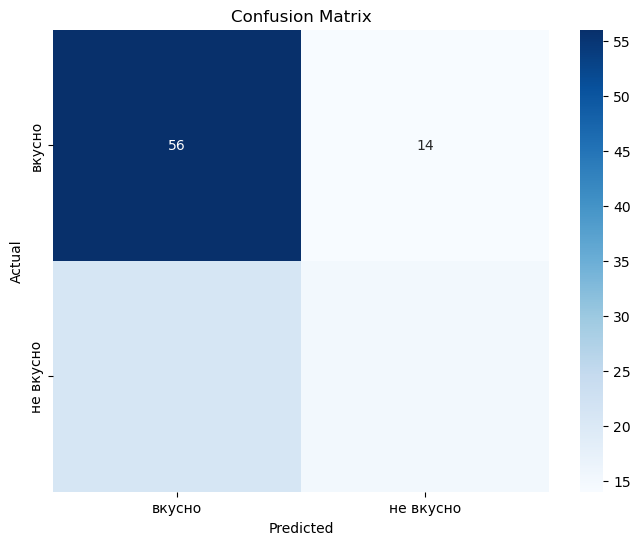

In [285]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_array, prediction, labels=['вкусно', 'не вкусно'])

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['вкусно', 'не вкусно'], columns=['вкусно', 'не вкусно'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Analysis of the confusion matrix:**

From the confusion matrix, we observe:
- The model correctly predicts 'tasty' 56 times.
- The model correctly predicts 'not tasty' 15 times.

Analysis of False Positives (FP) and False Negatives (FN):
- 21 times, the model incorrectly predicts 'not tasty' when it is actually 'tasty' (FN).
- 14 times, the model incorrectly predicts 'tasty' when it is actually 'not tasty' (FP).


**Conclusion**

The model performs well in predicting the 'tasty' class, as indicated by the high Recall of 0.8 compared to the second class.

### Logistic Regression Model Analysis

**False Positive (Type I Error)** occurs when the model predicts tasty milk, but it is actually not tasty. This means the farmer will buy cows whose milk is not actually tasty.

**False Negative (Type II Error)** occurs when the model predicts not tasty milk, but it is actually tasty. Consequently, the farmer might reject cows that would produce tasty milk.

In this case, **Type I error is more critical** because ignoring it could lead the farmer to buy many cows that produce not tasty milk.

Therefore, **Precision is the more important metric** in this context. A high Precision means fewer cows that produce not tasty milk will be selected. Recall is also important to identify all tasty milk, but for the farmer, avoiding cows that do not suit their needs is crucial.

To reduce the critical error to zero, we need to adjust the threshold for class membership.

In [292]:
y_test_binary = y_test.map({'вкусно': 1, 'не вкусно': 0})

y_proba = clf.predict_proba(X_test_final)[:, 1]
data = pd.DataFrame(zip(y_test_binary, y_proba), columns=['y_valid', 'y_proba']).sort_values(by='y_proba', ascending=False)
print(data.head(4))

    y_valid   y_proba
45        0  0.801189
62        0  0.760380
61        1  0.759630
17        1  0.752283


In [294]:
# Define thresholds
thresholds = [round(i, 2) for i in np.linspace(0.6, 0.9, num=5, endpoint=False)]
print(thresholds)

# Create variables to store results
columns = []
recalls = []
precisions = []
confusion_matrices = []

# Add new prediction columns to the data based on thresholds
for i in thresholds:
    column_name = 'y_pred_' + str(i)
    columns.append(column_name)
    data[column_name] = data['y_proba'].apply(lambda y_proba: 1 if y_proba >= i else 0)
    recall = recall_score(data['y_valid'], data[column_name])
    recalls.append(recall)
    precision = precision_score(data['y_valid'], data[column_name], zero_division=0)  # Handle zero division
    precisions.append(precision)
    cm = confusion_matrix(data['y_valid'], data[column_name])
    confusion_matrices.append(cm)

# Create a DataFrame to store thresholds, recalls, and precisions
recall_precision_df = pd.DataFrame({'Threshold': thresholds, 'Recall': recalls, 'Precision': precisions})
print(recall_precision_df)

# Print confusion matrices for each threshold
for idx, threshold in enumerate(thresholds):
    print(f'Confusion Matrix at Threshold {threshold}:')
    print(confusion_matrices[idx])

[0.6, 0.66, 0.72, 0.78, 0.84]
   Threshold    Recall  Precision
0       0.60  0.200000   0.636364
1       0.66  0.085714   0.500000
2       0.72  0.042857   0.428571
3       0.78  0.000000   0.000000
4       0.84  0.000000   0.000000
Confusion Matrix at Threshold 0.6:
[[28  8]
 [56 14]]
Confusion Matrix at Threshold 0.66:
[[30  6]
 [64  6]]
Confusion Matrix at Threshold 0.72:
[[32  4]
 [67  3]]
Confusion Matrix at Threshold 0.78:
[[35  1]
 [70  0]]
Confusion Matrix at Threshold 0.84:
[[36  0]
 [70  0]]


From the analysis of the classification threshold, we see that to achieve FP of 0, the threshold should be set around 0.84.

### Calculation of milk taste prediction

Here we predict the milk taste for `df_cow_buy`.

In [299]:
# prepare data cow_buy
X_cow_buy_ohe = encoder.transform(df_cow_buy[cat_col_names])
encoder_col_names = encoder.get_feature_names_out(cat_col_names)

X_cow_buy_scaled = scaler.transform(df_cow_buy[num_col_names])

X_cow_buy_ohe_df = pd.DataFrame(X_cow_buy_ohe, columns=encoder_col_names)
X_cow_buy_scaled_df = pd.DataFrame(X_cow_buy_scaled, columns=num_col_names)

X_cow_buy_final = pd.concat([X_cow_buy_ohe_df, X_cow_buy_scaled_df], axis=1)

# get prediction for taste of milk cow_buy
y_proba = clf.predict_proba(X_cow_buy_final)[:, 1]
milk_threshold = (y_proba >= 0.84).astype(int)
df_cow_buy['milk_taste_pred'] = milk_threshold

display(df_cow_buy.head())


,breed,type_of_pasture,sire_breed,sire_name,milk_fat,milk_protein,...,spo,raw_protein,eke_square,spo_binary,yield_prediction,milk_taste_pred
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,...,0.958772,2019.532273,233.205675,1,6518.520472,0
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,...,0.958772,2019.532273,233.205675,1,6316.669659,0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,...,0.958772,2019.532273,233.205675,1,6327.952591,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,...,0.958772,2019.532273,233.205675,1,6578.483186,0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,...,0.958772,2019.532273,233.205675,1,6578.483186,0


In [301]:
print(df_cow_buy['milk_taste_pred'].value_counts())

milk_taste_pred
0    19
1     1
Name: count, dtype: int64


## Final conclusions

### Recommendation to the farmer

Let's select cows predicted to yield more than 6000 kilograms of milk per year and have delicious milk.

In [306]:
best_cows = df_cow_buy[(df_cow_buy['yield_prediction'] >= 6000) & (df_cow_buy['milk_taste_pred'] == 1)]
display(best_cows)

,breed,type_of_pasture,sire_breed,sire_name,milk_fat,milk_protein,...,spo,raw_protein,eke_square,spo_binary,yield_prediction,milk_taste_pred
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,...,0.958772,2019.532273,233.205675,1,6518.520472,1


The farmer is recommended to purchase 2 cows out of 20 with minimal risks, as these cows produce delicious milk and yield more than 6000 kg per year.

For more accurate predictions, considering other models or adding additional features could be beneficial.


### Linear Regression and Logistic Regression:

- To improve the quality of the regression model, a correlation analysis was conducted to identify relevant (linear) features and mitigate multicollinearity.
- Additionally, a method was applied to add an additional feature, which slightly improved the model's performance.
- To address nonlinearity, some features like FCM and ECM were transformed using squaring and clustering methods.


The following steps were undertaken:
- Outlier removal and handling missing values
- Scaling and encoding of data
- Transformation of features to linearize them
- Addressing multicollinearity
- Addition of new features

Possible improvements include adding new features.

When analyzing risks or conducting economic calculations in classification tasks, including logistic regression, it's important to consider the following metrics:

- **Accuracy**: Provides an overall view of the model's performance, but can be misleading if the classes are imbalanced.
- **Precision**: Important when false predictions are costly, as it focuses on the accuracy of positive predictions.
- **Recall**: Critical when it's crucial not to miss positive cases, as it measures the ability of the model to identify all positive instances.

Additionally, the confusion matrix is a valuable tool for understanding how errors are distributed across classes. Adjusting the classification threshold can also be helpful in optimizing the model's performance for specific requirements.